### Команда: Форін Дмитро, Спекторовська Лада КА-24

### Початкові дані: sklearn.datasets.make_moons

### 1) Представити початковi данi графiчно.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import VisualizeNN as VisNN
from sklearn.inspection import DecisionBoundaryDisplay

### 1) Представити початковi данi графiчно.

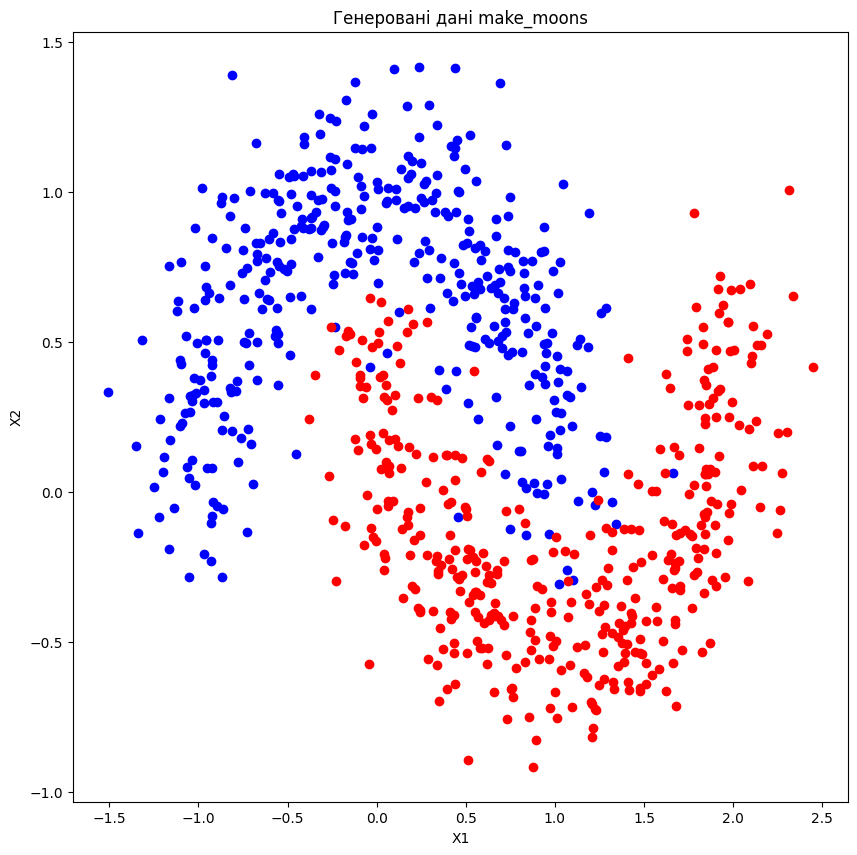

In [7]:
X, y= make_moons(n_samples=800, noise=0.2,random_state=50)
plt.figure(figsize=(10,10))
plt.scatter(X[y==0,0],X[y==0,1], color='blue', label='class 0')
plt.scatter(X[y==1,0],X[y==1,1], color='red', label='class 0')
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Генеровані дані make_moons')
plt.show()

### 2) Розбити данi на навчальний та валiдацiйний набори.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 3) Побудувати на навчальному наборi даних моделi класифiкацiї або регресiї заданi згiдно з варiантом.

Почнемо з одношарової моделі нейронної мережі і визначимо, чи достатньо буде одношарової моделі для опису даних.

In [9]:
needed_accuracy=0.95
model=MLPClassifier(hidden_layer_sizes=(1,),random_state=50, max_iter=300)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(1,), max_iter=300, random_state=50)

In [10]:
actual_acc=model.score(X_test, y_test)
print(actual_acc)

0.50625


Реалізуємо динамічне додавання нейронів до скритого шару. Перевіримо, скільки нейронів в одношаровій моделі буде достатньо для задовільного розв'язання задачі.

In [16]:
max_neurons=20
accuracies=[]
precisions=[]
recalls=[]
f1_scores=[]
fpr_arr=[]
tpr_arr=[]
train_accuracies=[]
train_precisions=[]
train_recalls=[]
train_f1_scores=[]
train_fpr_arr=[]
train_tpr_arr=[]
PRprec_test=[]
PRrecall_test=[]
PRprec_train=[]
PRrecall_train=[]
temp=0

In [17]:
for n_neurons in range(1, max_neurons + 1):
    multi_neurons_model=MLPClassifier(hidden_layer_sizes=(n_neurons,),random_state=50,max_iter=1000,learning_rate="adaptive", learning_rate_init=0.01)
    multi_neurons_model.fit(X_train,y_train)

    y_pred_test=multi_neurons_model.predict(X_test)
    y_pred_train=multi_neurons_model.predict(X_train)

    
    temp=multi_neurons_model.score(X_test,y_test)
    actual_acc=temp
    accuracies.append(temp)
    temp=multi_neurons_model.score(X_train,y_train)
    train_accuracies.append(temp)
    
    temp=precision_score(y_test, y_pred_test)
    precisions.append(temp)
    temp=precision_score(y_train, y_pred_train)
    train_precisions.append(temp)
    
    temp=recall_score(y_test, y_pred_test)
    recalls.append(temp)
    temp=recall_score(y_train, y_pred_train)
    train_recalls.append(temp)

    temp=f1_score(y_test,y_pred_test)
    f1_scores.append(temp)
    temp=f1_score(y_train,y_pred_train)
    train_f1_scores.append(temp)


    
    fpr_test,tpr_test,_=roc_curve(y_test,y_pred_test)
    fpr_arr.append(fpr_test)
    tpr_arr.append(tpr_test)

    fpr_train,tpr_train,_=roc_curve(y_train,y_pred_train)
    train_fpr_arr.append(fpr_train)
    train_tpr_arr.append(tpr_train)

    prec_test,rec_test,_=precision_recall_curve(y_test,y_pred_test)
    PRprec_test.append(prec_test)
    PRrecall_test.append(rec_test)
    
    prec_train,rec_train,_=precision_recall_curve(y_train,y_pred_train)
    PRprec_train.append(prec_train)
    PRrecall_train.append(rec_train)


    if actual_acc>=needed_accuracy or n_neurons==max_neurons:
        print("Achieved accuracy: ", actual_acc, "neurons quantity: ", n_neurons)
        break

Achieved accuracy:  0.975 neurons quantity:  7


### 9) В задачах класифiкацiї розрахувати для кожної моделi значення наступних критерiїв якостi, окремо на навчальнiй та валiдацiйнiй множинах:  
    • матрицю неточностей (confusion matrix)  
    • точнiсть (precision)  
    • повноту (recall)  
    • мiру F1 (F1 score)  
    • побудувати криву точностi-повноти (precision-recall (PR) curve), ROC-криву, показник AUC.
Розглянемо зміну показників моделі зі збільшенням кількості нейронів

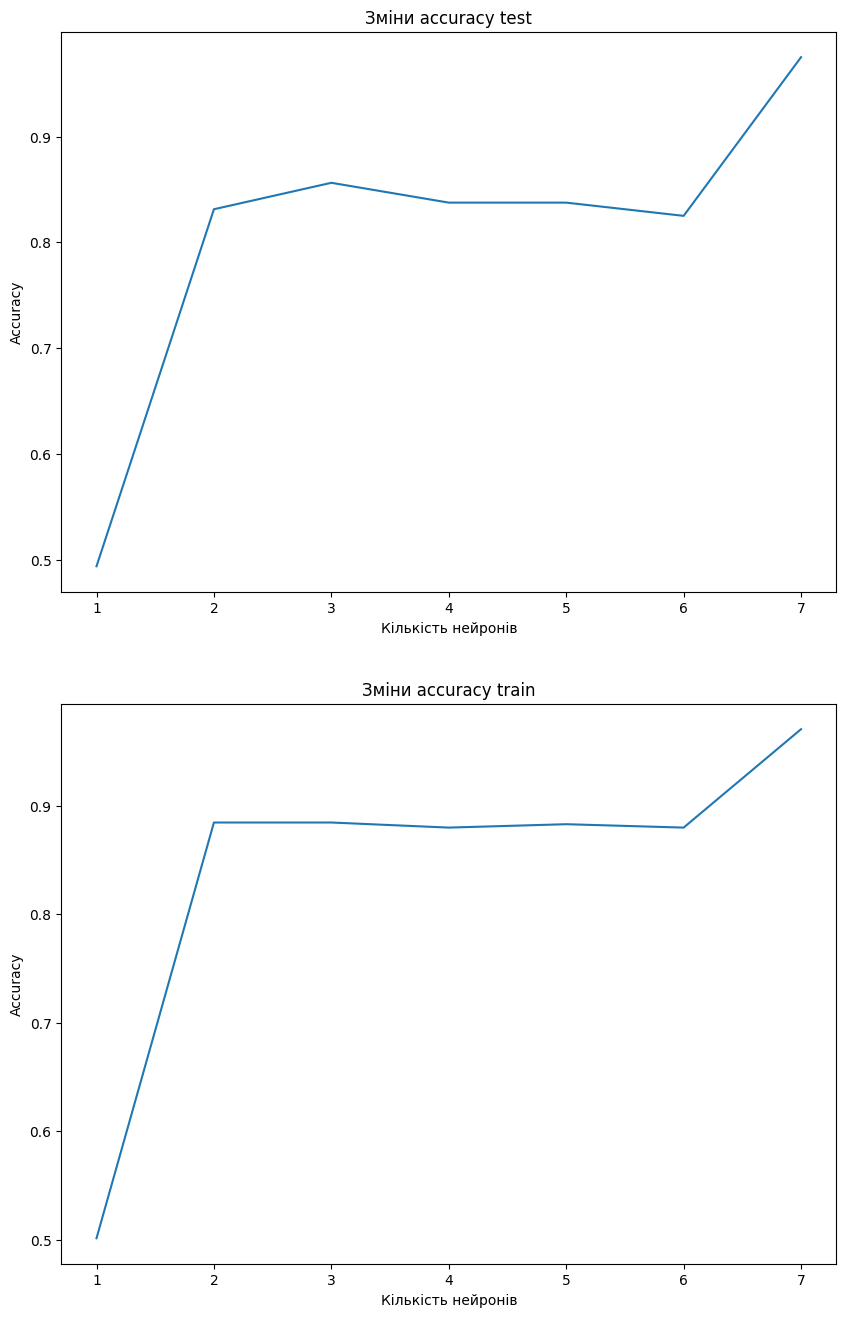

In [18]:
x=[1,2,3,4,5,6,7]
plt.figure(figsize=(10,16))
plt.subplot(2,1,1)
plt.plot(x,accuracies)
plt.xlabel("Кількість нейронів")
plt.ylabel("Accuracy")
plt.title("Зміни accuracy test")
plt.subplot(2,1,2)
plt.plot(x,train_accuracies)
plt.xlabel("Кількість нейронів")
plt.ylabel("Accuracy")
plt.title("Зміни accuracy train")
plt.show()

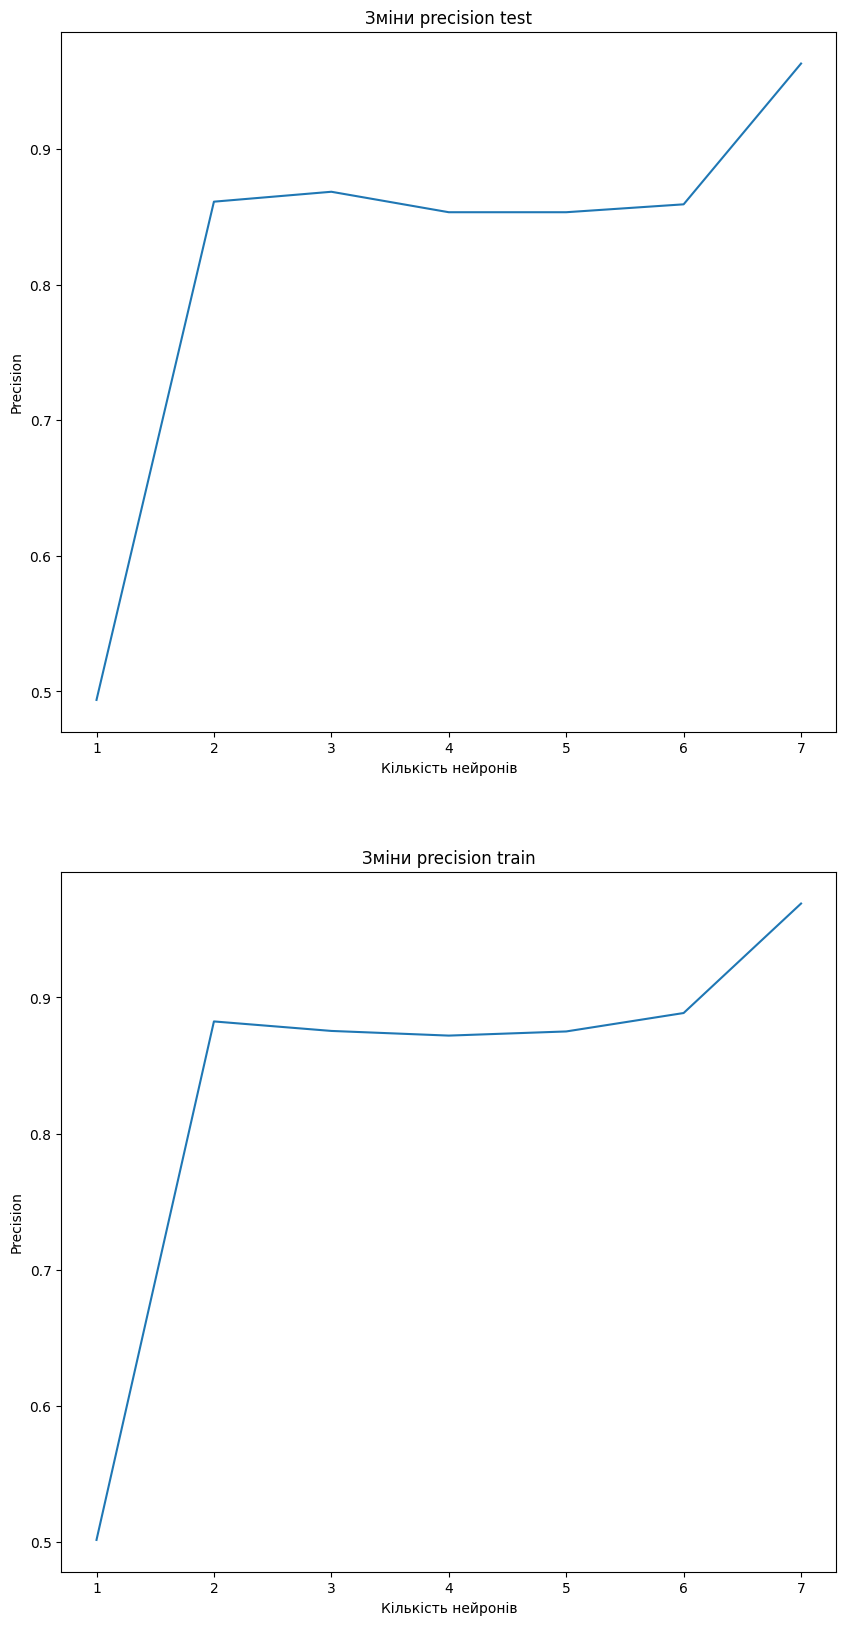

In [19]:
x=[1,2,3,4,5,6,7]
plt.figure(figsize=(10,20))
plt.subplot(2,1,1)
plt.plot(x,precisions)
plt.xlabel("Кількість нейронів")
plt.ylabel("Precision")
plt.title("Зміни precision test")
plt.subplot(2,1,2)
plt.plot(x,train_precisions)
plt.xlabel("Кількість нейронів")
plt.ylabel("Precision")
plt.title("Зміни precision train")
plt.show()

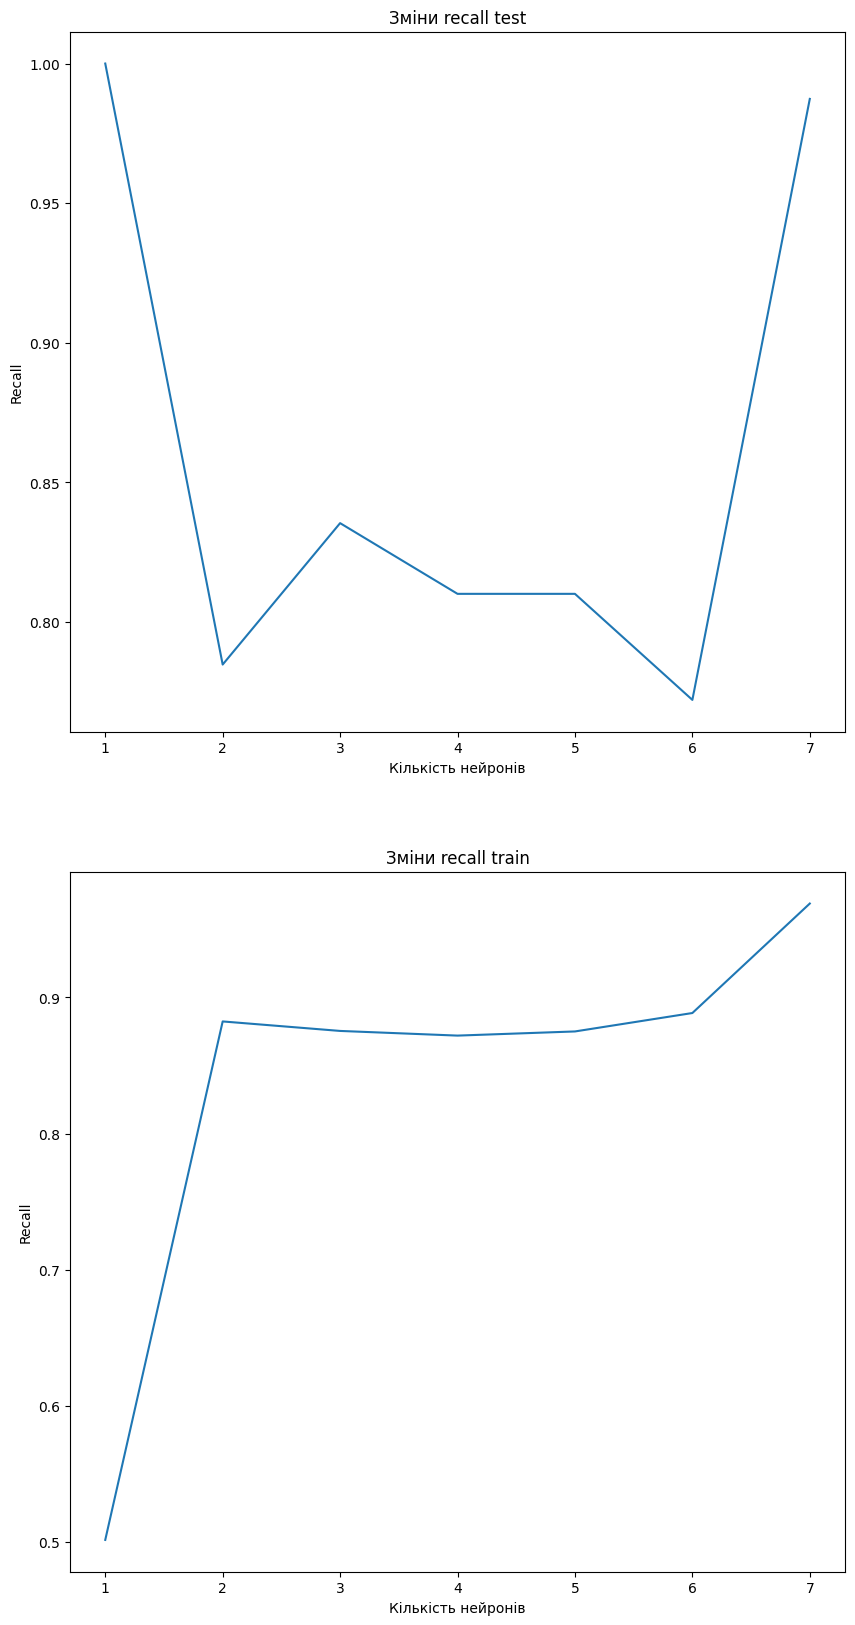

In [ ]:
x=[1,2,3,4,5,6,7]
plt.figure(figsize=(10,20))
plt.subplot(2,1,1)
plt.plot(x,recalls)
plt.xlabel("Кількість нейронів")
plt.ylabel("Recall")
plt.title("Зміни recall test")
plt.subplot(2,1,2)
plt.plot(x,train_recalls)
plt.xlabel("Кількість нейронів")
plt.ylabel("Recall")
plt.title("Зміни recall train")
plt.show()

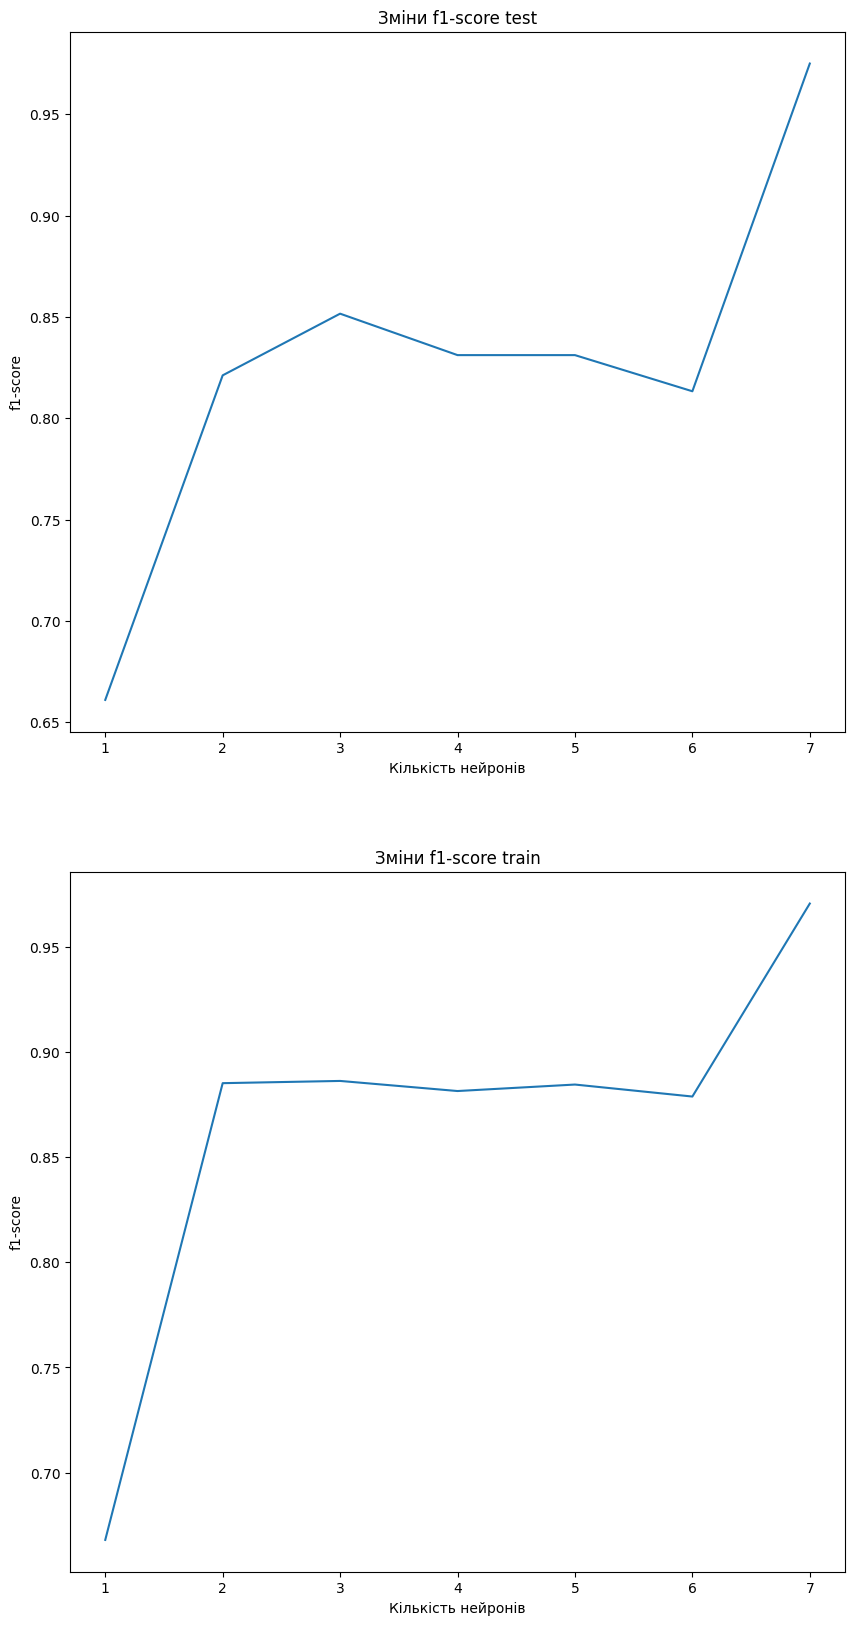

In [22]:
x=[1,2,3,4,5,6,7]
plt.figure(figsize=(10,20))
plt.subplot(2,1,1)
plt.plot(x,f1_scores)
plt.xlabel("Кількість нейронів")
plt.ylabel("f1-score")
plt.title("Зміни f1-score test")
plt.subplot(2,1,2)
plt.plot(x,train_f1_scores)
plt.xlabel("Кількість нейронів")
plt.ylabel("f1-score")
plt.title("Зміни f1-score train")
plt.show()

In [23]:
roc_test_aucs=[]
roc_train_aucs=[]
pr_test_aucs=[]
pr_train_aucs=[]

In [24]:
for i in range(1,8):
    test_auc=auc(fpr_arr[i-1],tpr_arr[i-1])
    roc_test_aucs.append(test_auc)
    train_auc=auc(train_fpr_arr[i-1],train_tpr_arr[i-1])
    roc_train_aucs.append(train_auc)
    test_auc=auc(PRprec_test[i-1],PRrecall_test[i-1])
    pr_test_aucs.append(test_auc)
    train_auc=auc(PRprec_train[i-1],PRrecall_train[i-1])
    pr_train_aucs.append(train_auc)

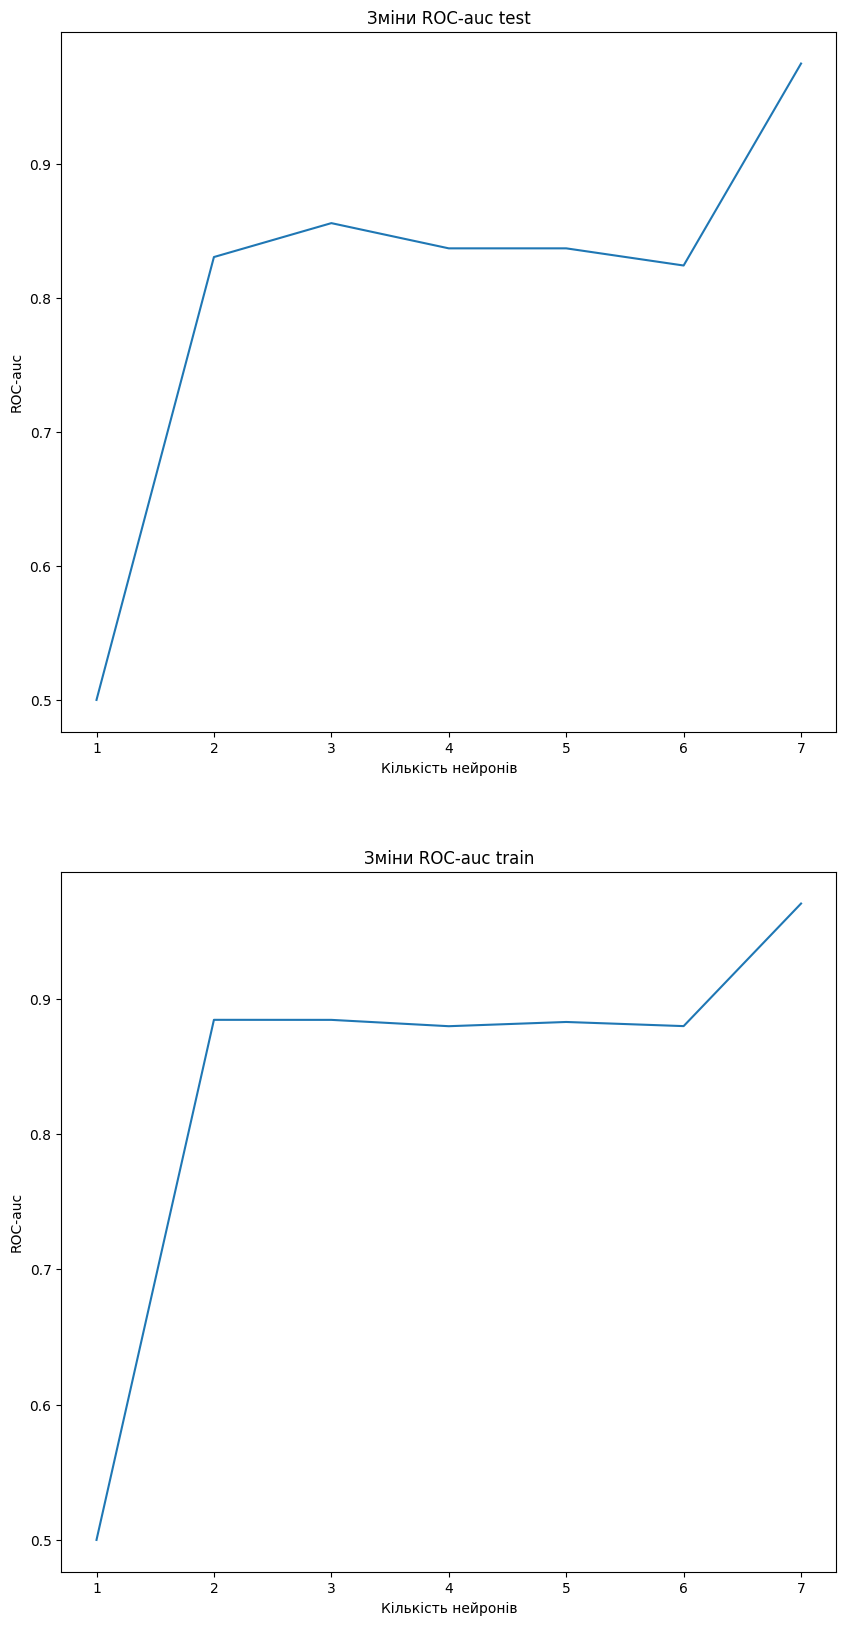

In [25]:
x=[1,2,3,4,5,6,7]
plt.figure(figsize=(10,20))
plt.subplot(2,1,1)
plt.plot(x,roc_test_aucs)
plt.xlabel("Кількість нейронів")
plt.ylabel("ROC-auc")
plt.title("Зміни ROC-auc test")
plt.subplot(2,1,2)
plt.plot(x,roc_train_aucs)
plt.xlabel("Кількість нейронів")
plt.ylabel("ROC-auc")
plt.title("Зміни ROC-auc train")
plt.show()

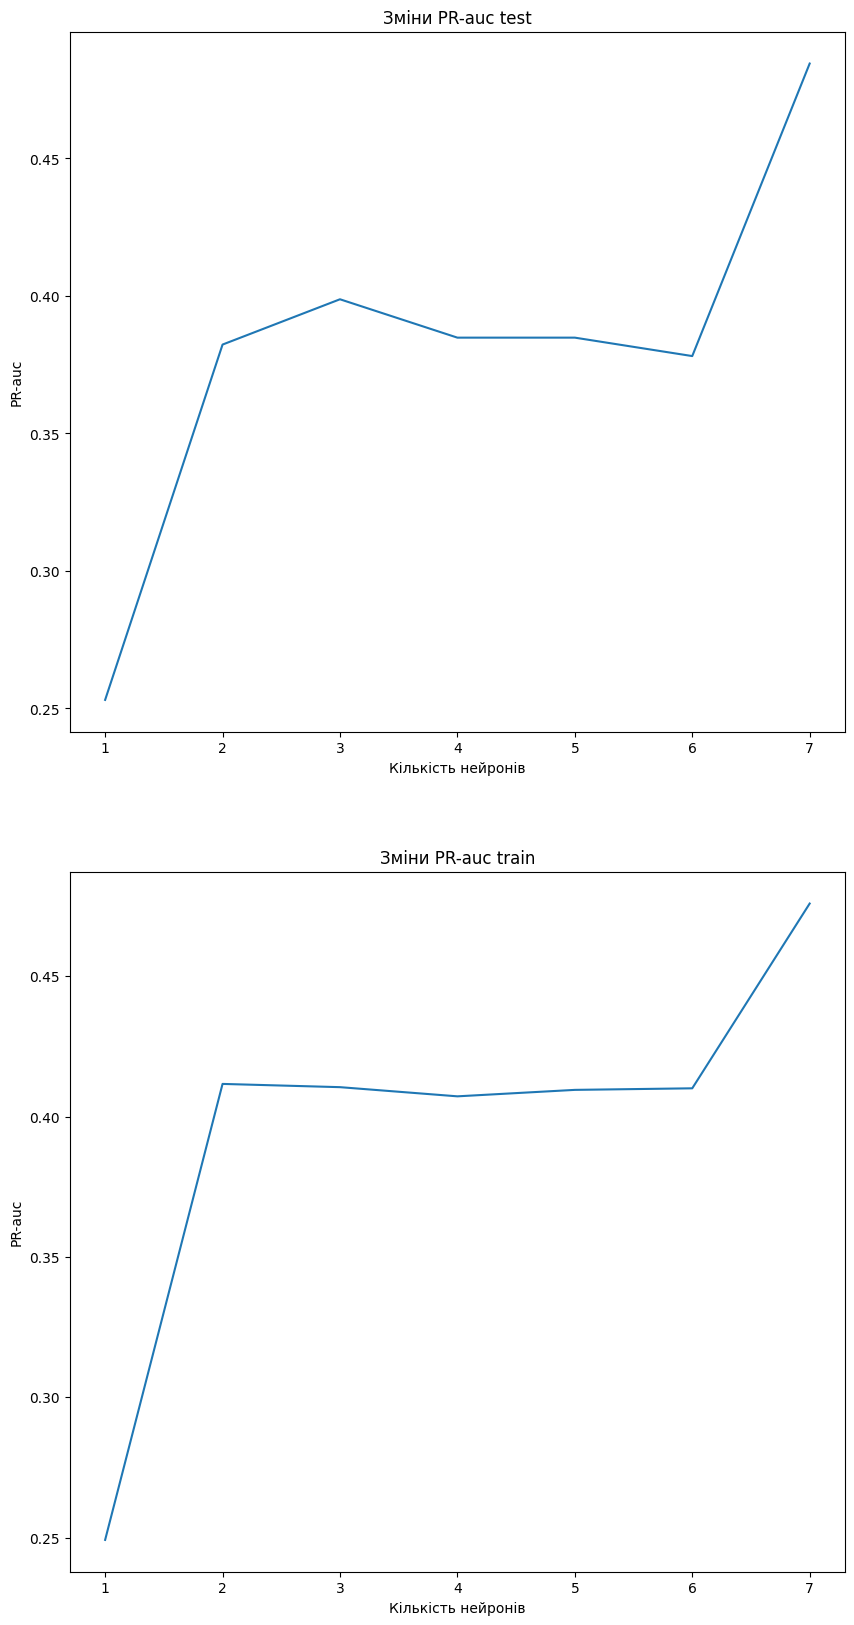

In [26]:
x=[1,2,3,4,5,6,7]
plt.figure(figsize=(10,20))
plt.subplot(2,1,1)
plt.plot(x,pr_test_aucs)
plt.xlabel("Кількість нейронів")
plt.ylabel("PR-auc")
plt.title("Зміни PR-auc test")
plt.subplot(2,1,2)
plt.plot(x,pr_train_aucs)
plt.xlabel("Кількість нейронів")
plt.ylabel("PR-auc")
plt.title("Зміни PR-auc train")
plt.show()

### Побудуємо PR та ROC криві та матрицю неточностей для навченної моделі на сім нейронів

In [97]:
y_pred_test=multi_neurons_model.predict(X_test)
y_pred_train=multi_neurons_model.predict(X_train)
print(confusion_matrix(y_test, y_pred_test))
print(confusion_matrix(y_train, y_pred_train))

[[78  3]
 [ 1 78]]
[[309  10]
 [  9 312]]


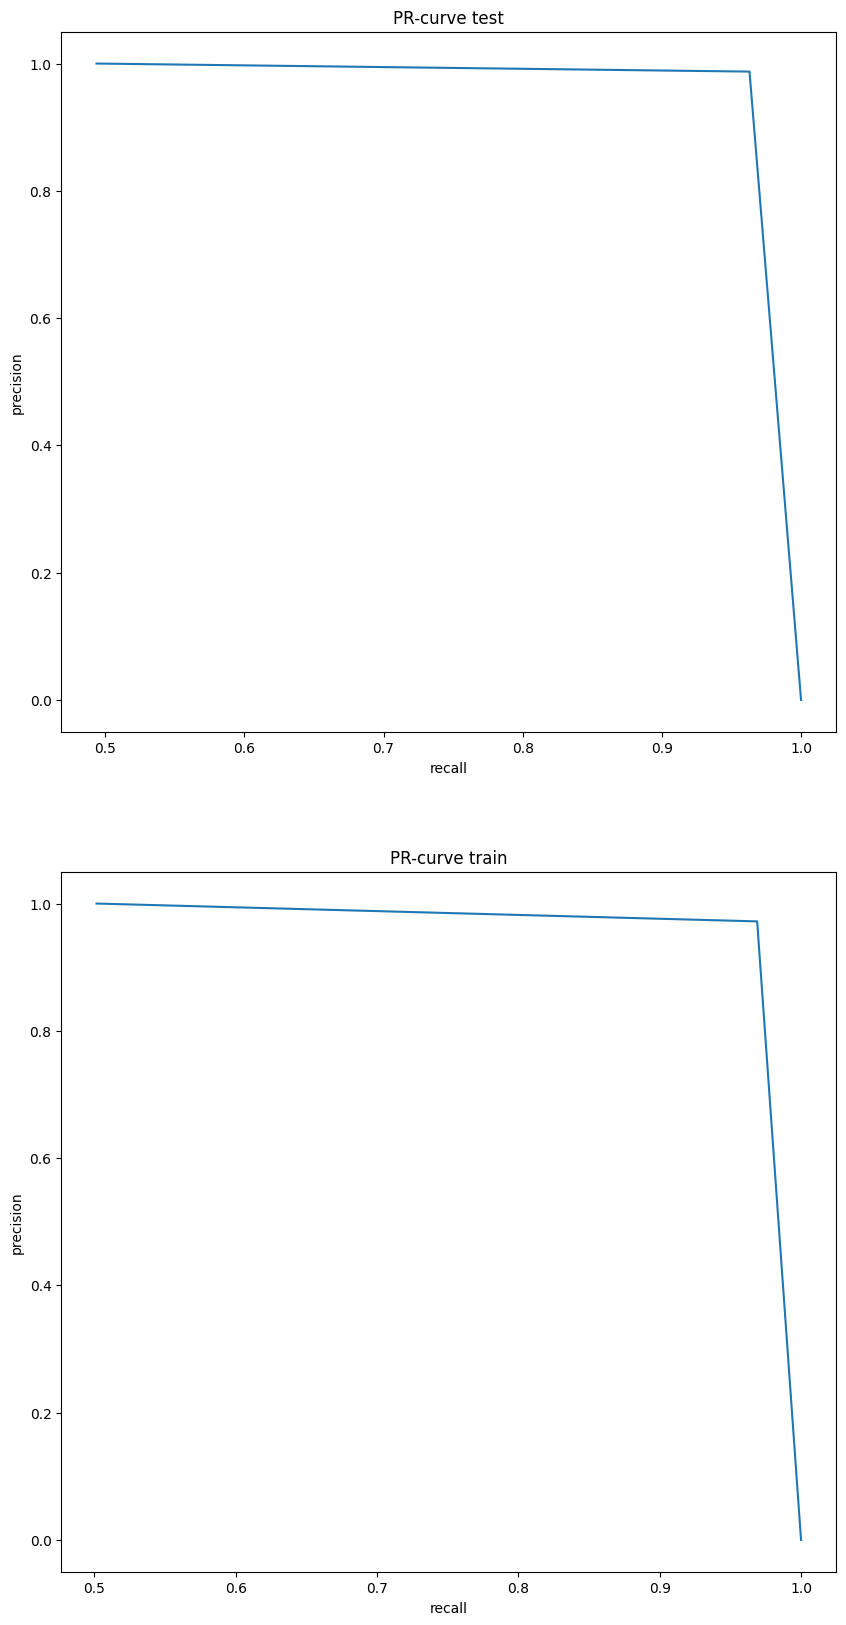

In [27]:
plt.figure(figsize=(10,20))
plt.subplot(2,1,1)
plt.plot(PRprec_test[6],PRrecall_test[6])
plt.xlabel("recall")
plt.ylabel("precision")
plt.title("PR-curve test")
plt.subplot(2,1,2)
plt.plot(PRprec_train[6],PRrecall_train[6])
plt.xlabel("recall")
plt.ylabel("precision")
plt.title("PR-curve train")
plt.show()

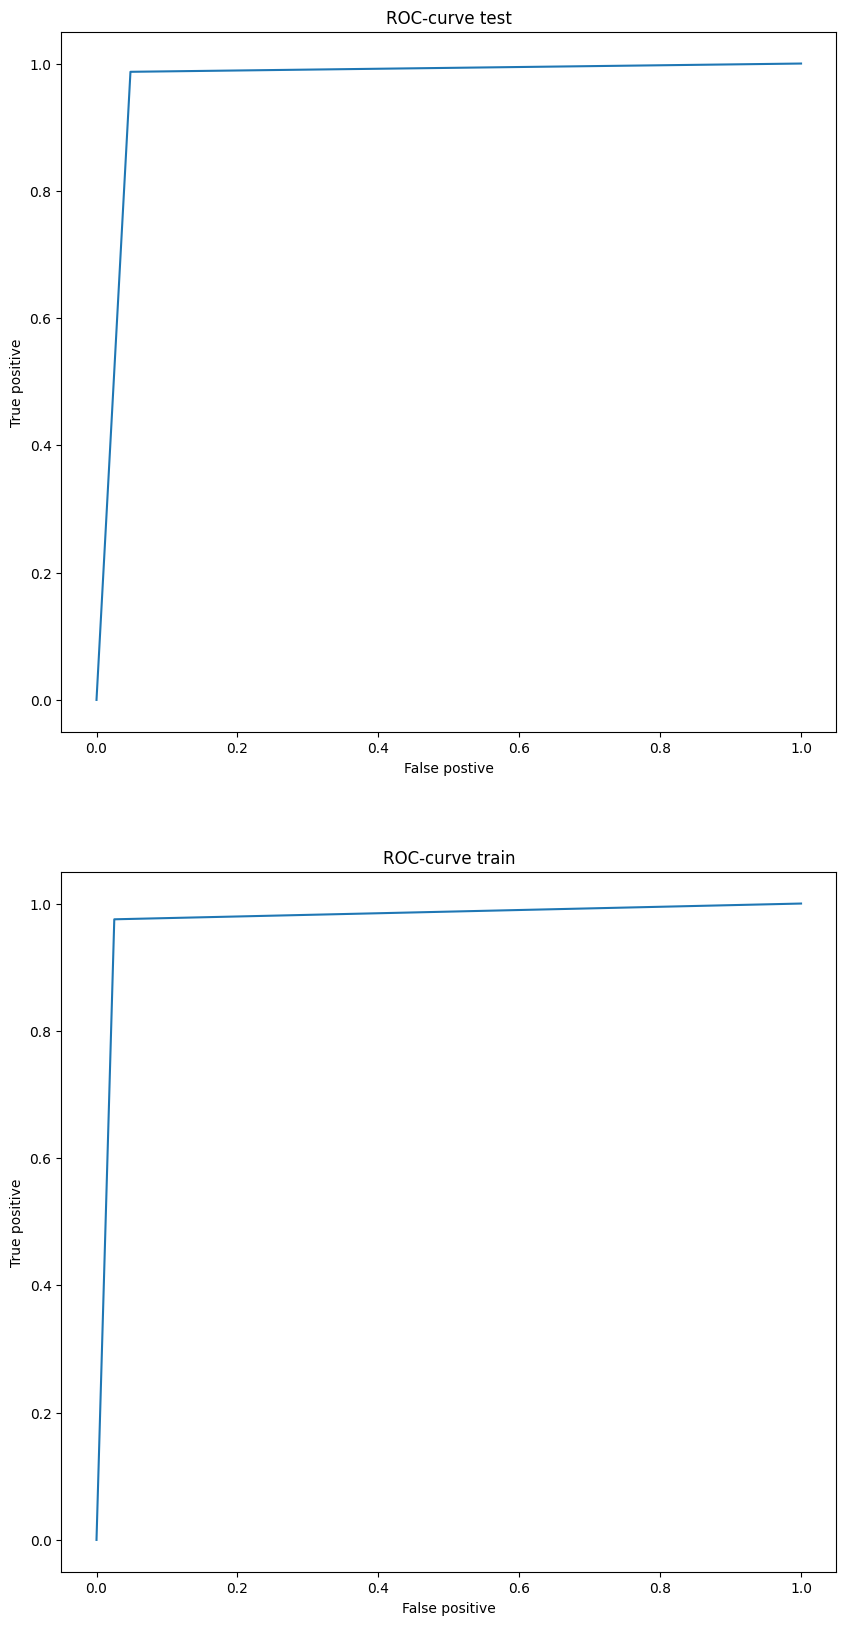

In [17]:
plt.figure(figsize=(10,20))
plt.subplot(2,1,1)
plt.plot(fpr_arr[6],tpr_arr[6])
plt.xlabel("False postive")
plt.ylabel("True positive")
plt.title("ROC-curve test")
plt.subplot(2,1,2)
plt.plot(train_fpr_arr[6],train_tpr_arr[6])
plt.xlabel("False positive")
plt.ylabel("True positive")
plt.title("ROC-curve train")
plt.show()

### 4) Представити моделi графiчно 

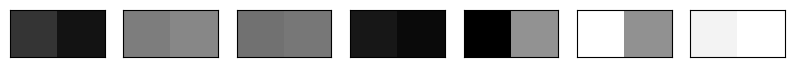

In [77]:
fig, axes = plt.subplots(1, 7, figsize=(10,10))
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = multi_neurons_model.coefs_[0].min(), multi_neurons_model.coefs_[0].max()
for coef, ax in zip(multi_neurons_model.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(1,-1), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [81]:
print(multi_neurons_model.coefs_[0])

[[-1.08370285 -0.05471021 -0.22287161 -1.4971975  -3.66303433  3.60687423
   1.62012779]
 [-1.54989692  0.08874941 -0.12891163 -1.68741021  0.25401477  0.23208001
   1.92456004]]


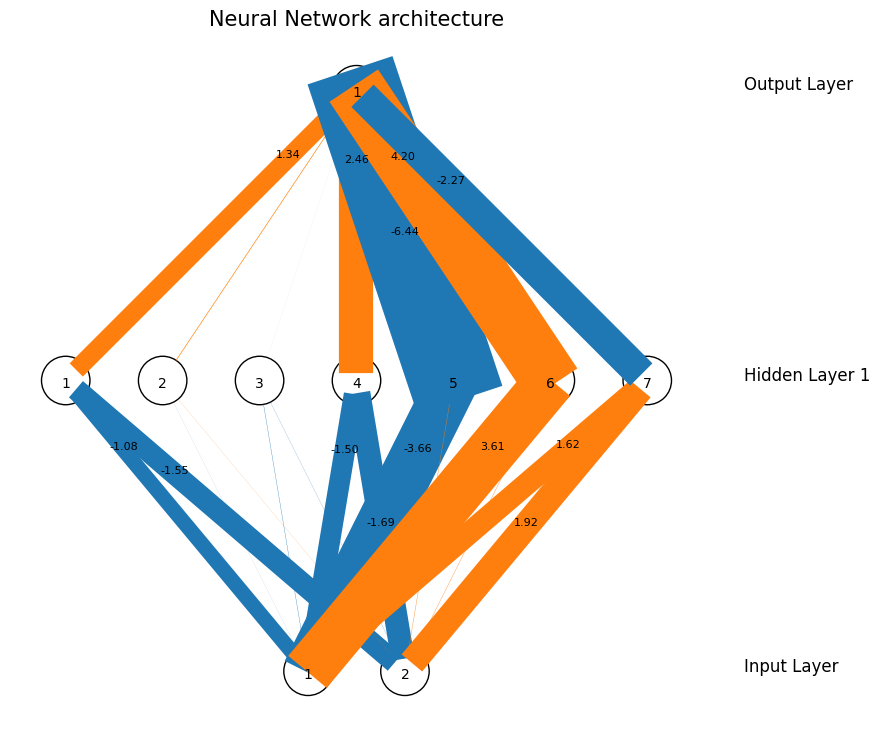

In [64]:
network_structure=[2,7,1]
network=VisNN.DrawNN(network_structure, multi_neurons_model.coefs_)
network.draw()

### 5)Виконати прогнози на основi побудованих моделей.

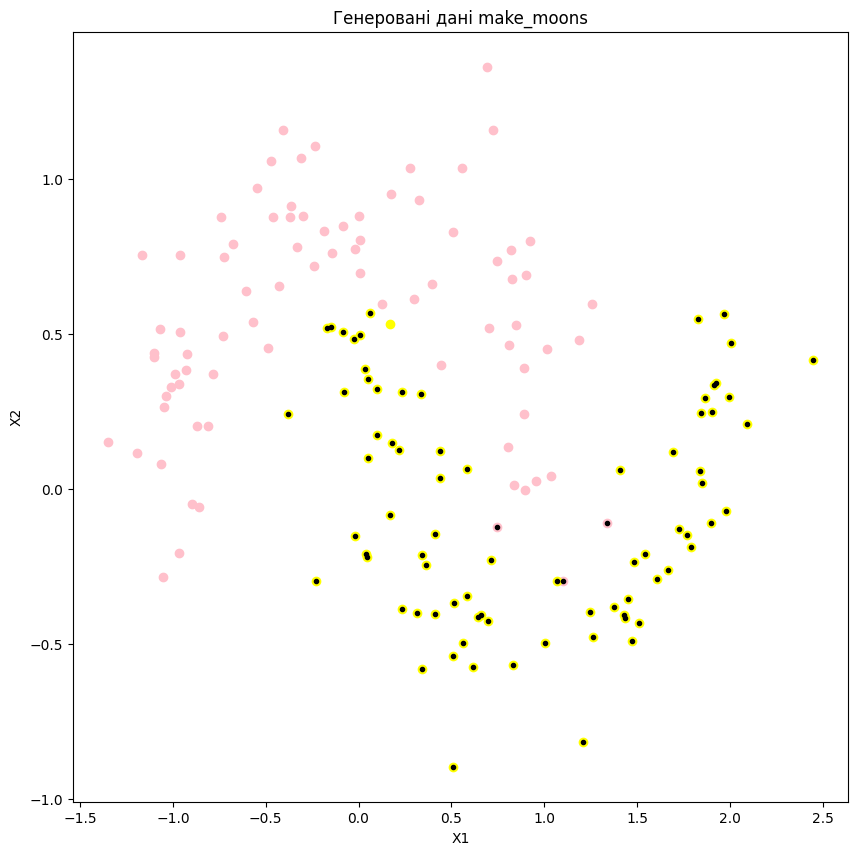

In [98]:
plt.figure(figsize=(10,10))
plt.scatter(X_test[y_test==0,0],X_test[y_test==0,1], color='pink', label='class 0')
plt.scatter(X_test[y_test==1,0],X_test[y_test==1,1], color='yellow', label='class 0')
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.scatter(X_test[y_pred_test==1,0],X_test[y_pred_test==1,1], marker='.', color='black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Генеровані дані make_moons')
plt.show()

### 6)Для кожної з моделей оцiнити, чи має мiсце перенавчання.

In [111]:
print(multi_neurons_model.score(X_train,y_train))
print(multi_neurons_model.score(X_test,y_test))

0.9703125
0.975


Як можна бачити різниця між у результатах між навчальною і тестовою вибіркою незначна отже перенавчання відсутнє


### 7) Розрахуємо додатковi результати моделей, згiдно з варiантом. Варіант 11 - Для кожної моделi розрахувати апостерiорнi iмовiрностi для тестового прикладу, використовуючи метод predict_proba.


Aposterior probability:
       class_0   class_1
0    0.010087  0.989913
1    0.008178  0.991822
2    0.991654  0.008346
3    0.961712  0.038288
4    0.012688  0.987312
..        ...       ...
155  0.850197  0.149803
156  0.999972  0.000028
157  0.999628  0.000372
158  0.258356  0.741644
159  0.010285  0.989715

[160 rows x 2 columns]


Text(0.5, 1.0, 'Апостеріорна ймовірність')

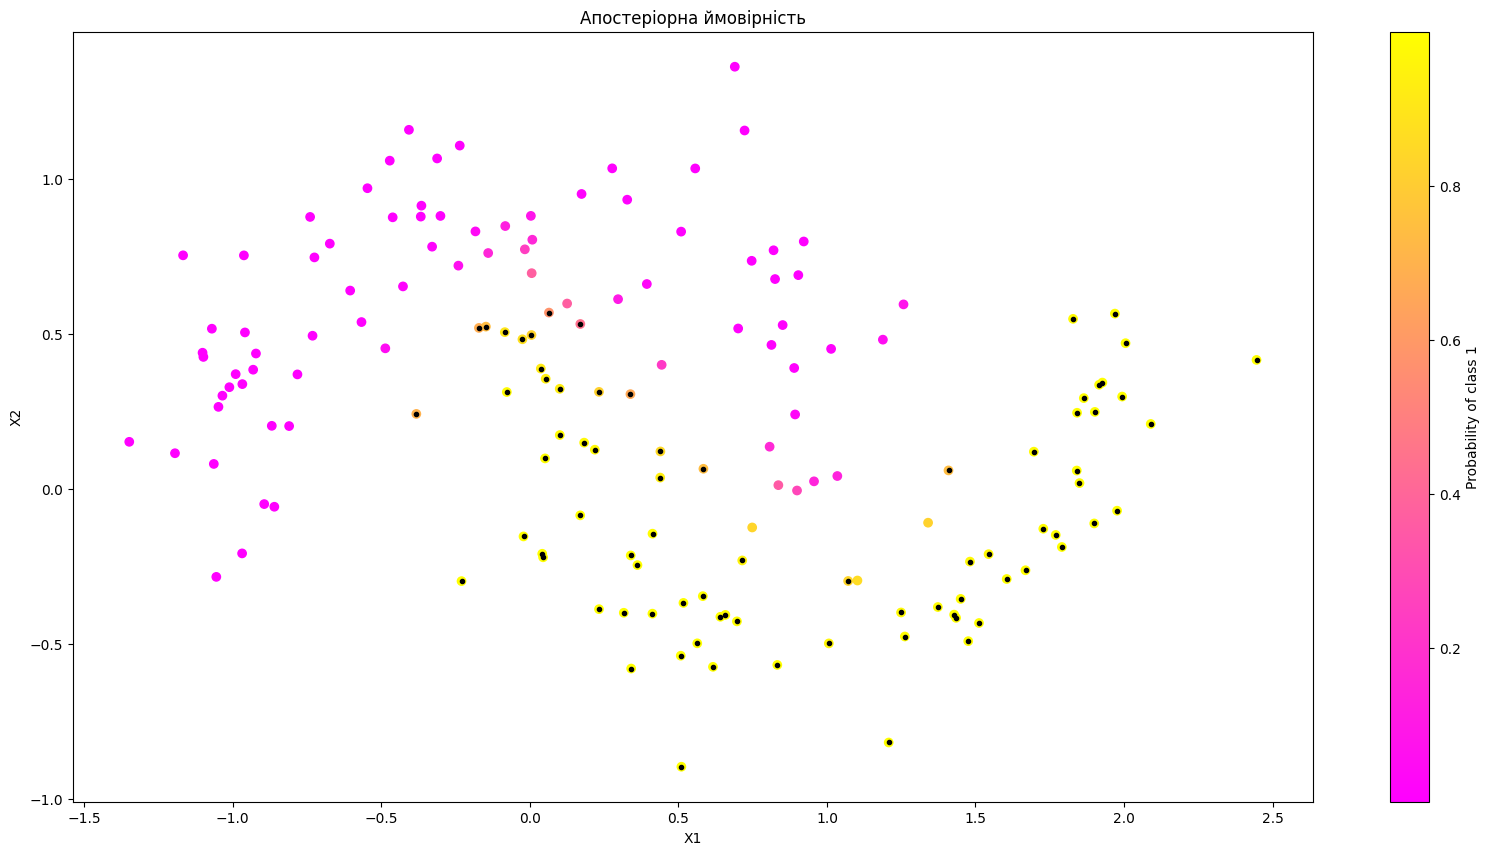

In [28]:
apost_prob=multi_neurons_model.predict_proba(X_test)
tempAP=pd.DataFrame({'class_0':apost_prob[:,0], 'class_1':apost_prob[:,1]})
print("Aposterior probability:\n",tempAP)
plt.figure(figsize=(20,10))
plt.scatter(X_test[:,0], X_test[:,1],c=tempAP['class_1'], cmap='spring')# yellow stands for 1 pink stands for 0
plt.colorbar(label='Probability of class 1')
plt.scatter(X_test[y_test==1,0],X_test[y_test==1,1], marker='.', color='black')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title("Апостеріорна ймовірність")

### 8) В задачах класифiкацiї побудувати границi рiшень графiчно для кожної з моделей.

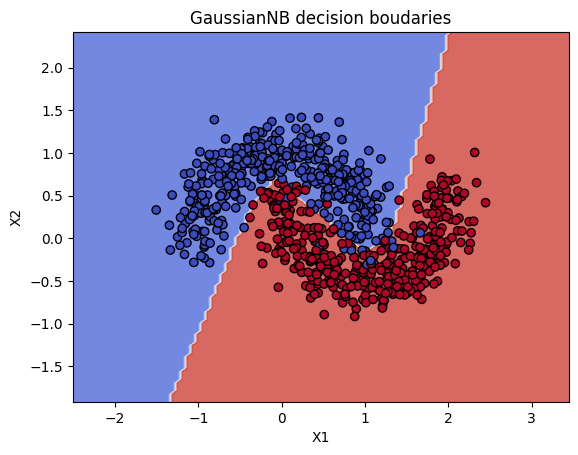

In [95]:

display = DecisionBoundaryDisplay.from_estimator(multi_neurons_model, X, response_method="predict", xlabel = 'X1', ylabel='X2', alpha=0.8, cmap='coolwarm')
display.ax_.scatter(X[:,0], X[:,1], c=y, edgecolor="k",cmap='coolwarm')
plt.title('GaussianNB decision boudaries')
plt.show()

### 11) Спробувати виконати решiтчастий пошук (grid search) для пiдбору гiперпараметрiв моделей.

In [103]:
mlp = MLPClassifier(max_iter=1000)

# Налаштування сітки параметрів для пошуку
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (50, 50)],  # кількість нейронів у шарах
    'activation': ['tanh', 'relu'],                         # функції активації
    'solver': ['sgd', 'adam'],                              # метод оптимізації
    'alpha': [0.0001, 0.001],                               # регуляризація
    'learning_rate': ['constant', 'adaptive'],              # адаптація швидкості навчання
}

# Виконання Grid Search
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Найкращі параметри
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Оцінка на тестових даних
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test set score: ", test_score)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best parameters found:  {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Best cross-validation score:  0.9671875
Test set score:  0.975


Як можна бачити вона не перевищує показник натренованої до цього моделі.

### 13) Навчити моделi на пiдмножинах навчальних даних. Оцiнити, наскiльки розмiр навчальної множини впливає на якiсть моделi.

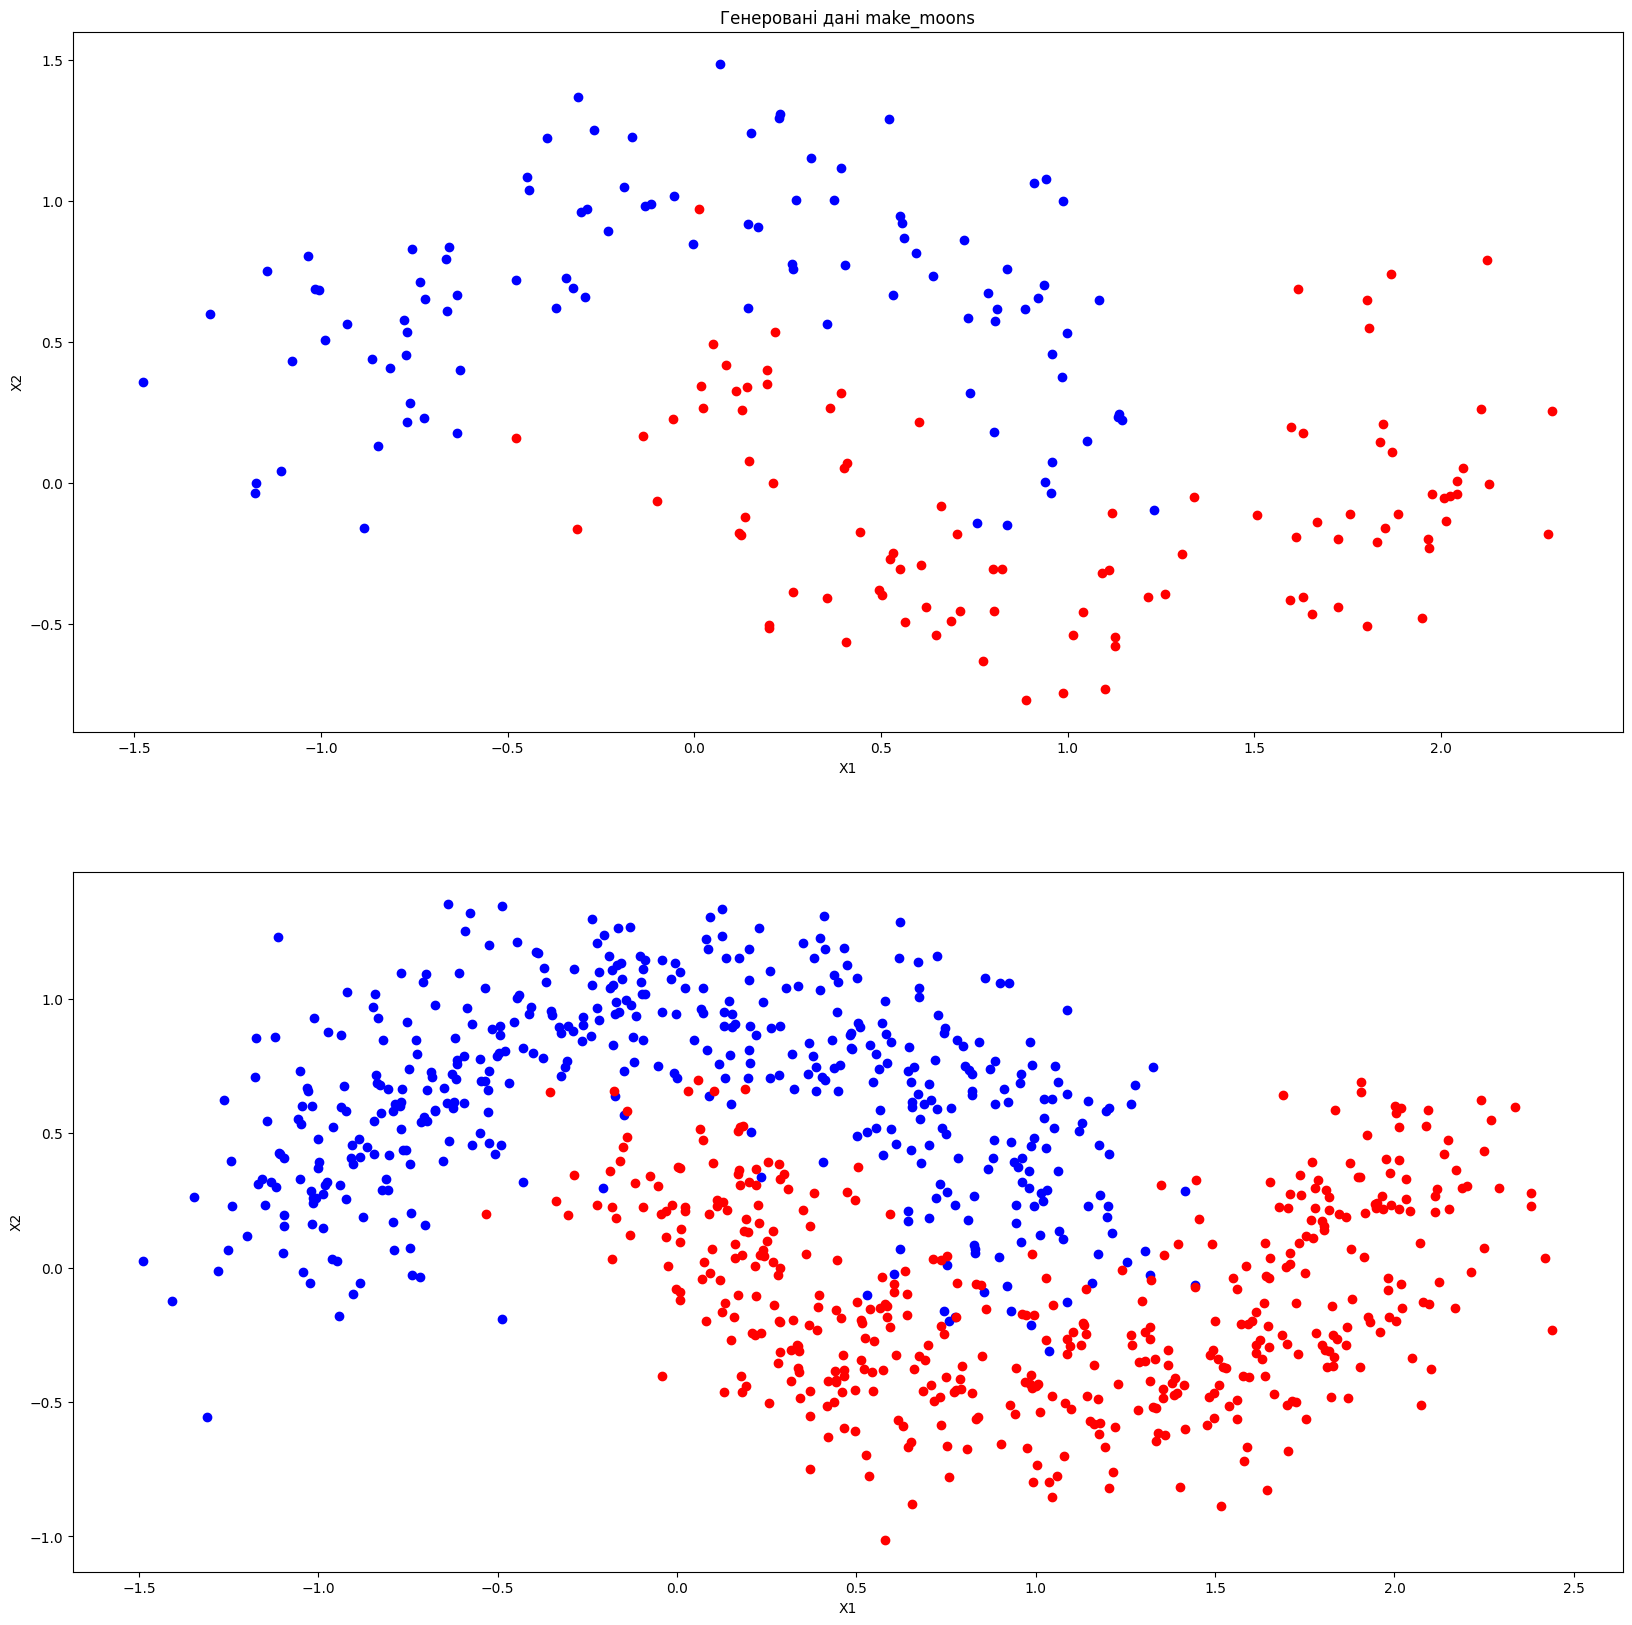

In [104]:
X1, y1= make_moons(n_samples=200, noise=0.2,random_state=42)
X2, y2= make_moons(n_samples=900, noise=0.2,random_state=42)
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
plt.scatter(X1[y1==0,0],X1[y1==0,1], color='blue', label='class 0')
plt.scatter(X1[y1==1,0],X1[y1==1,1], color='red', label='class 1')
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Генеровані дані make_moons')
plt.xlabel('X1')
plt.ylabel('X2')
plt.subplot(2,1,2)
plt.scatter(X2[y2==0,0],X2[y2==0,1], color='blue', label='class 0')
plt.scatter(X2[y2==1,0],X2[y2==1,1], color='red', label='class 1')
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [105]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X2, y2, test_size=0.2)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)

In [109]:
mlp1= MLPClassifier(
    hidden_layer_sizes=(10,),  # Прихований шар з 40 нейронами
    max_iter=1000,               # Збільшено до 200 ітерацій для кращої збіжності
    solver="adam",
    random_state=42,
    learning_rate='adaptive',
    learning_rate_init=0.01,
)
mlp1.fit(X1_train,y1_train)
mlp2= MLPClassifier(
    hidden_layer_sizes=(10,),  # Прихований шар з 40 нейронами
    max_iter=1000,               # Збільшено до 200 ітерацій для кращої збіжності
    solver="adam",
    random_state=42,
    learning_rate='adaptive',
    learning_rate_init=0.01,
)
mlp2.fit(X2_train,y2_train)

MLPClassifier(hidden_layer_sizes=(10,), learning_rate='adaptive',
              learning_rate_init=0.01, max_iter=1000, random_state=42)

In [110]:
print("MLP 200 result: ", mlp1.score(X1_test,y1_test))
print("MLP 900 result: ", mlp1.score(X2_test,y2_test))

MLP 200 result:  0.9611111111111111
MLP 900 result:  0.9666666666666667


Як можна бачити в данному випадку розмір вибірки хоч і має вплив на якість подальших оцінок моделі проте доволі незначний 

### Початкові дані: sklearn.datasets.load_digits

### 1) Представити початковi данi графiчно.

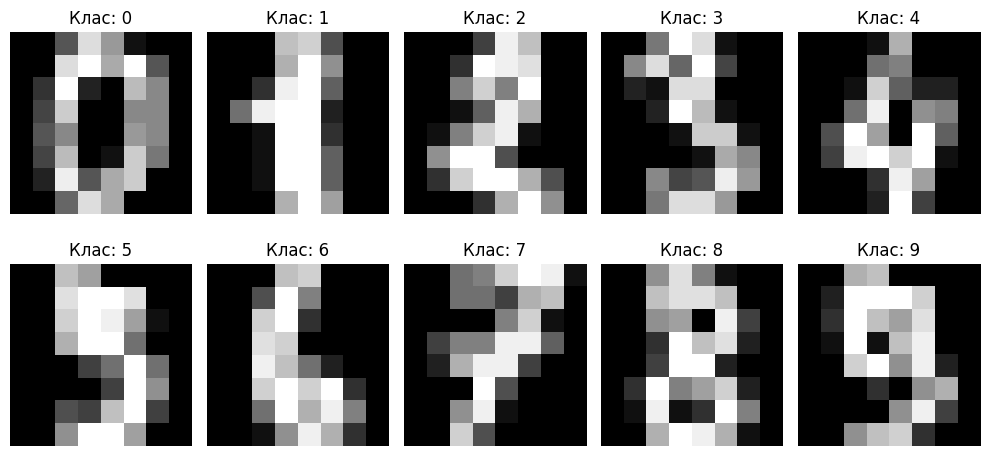

In [4]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
digits = load_digits()
X, y = digits.data, digits.target
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X[i].reshape(8, 8), cmap='gray')  # Виводимо перші 10 прикладів у вигляді 8x8 зображень
    ax.set_title(f'Клас: {digits.target[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

### 2) Розбити данi на навчальний та валiдацiйний набори.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3) Побудувати на навчальному наборi даних моделi класифiкацiї або регресiї заданi згiдно з варiантом.

Почнемо з одношарової моделі нейронної мережі і визначимо, чи достатньо буде одношарової моделі для опису даних.

In [8]:
needed_accuracy=0.95
model=MLPClassifier(hidden_layer_sizes=(1,),random_state=50, max_iter=300)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(1,), max_iter=300, random_state=50)

In [9]:
actual_acc=model.score(X_test, y_test)
print(actual_acc)

0.07777777777777778


Реалізуємо динамічне додавання нейронів до скритого шару. Перевіримо, скільки нейронів в одношаровій моделі буде достатньо для задовільного розв'язання задачі.

In [45]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, precision_recall_curve, auc
import numpy as np

max_neurons = 20
needed_accuracy = 0.95  # приклад потрібної точності
test_accuracies, test_precisions, test_recalls, test_f1_scores = [], [], [], []
train_accuracies, train_precisions, train_recalls, train_f1_scores = [], [], [], []
test_fpr_arr, test_tpr_arr, train_fpr_arr, train_tpr_arr = [], [], [], []
PRprec_test, PRrecall_test, PRprec_train, PRrecall_train = [], [], [], []

for n_neurons in range(1, max_neurons + 1):
    multi_neurons_model1 = MLPClassifier(hidden_layer_sizes=(n_neurons,), random_state=50, max_iter=1000, learning_rate="adaptive", learning_rate_init=0.01)
    multi_neurons_model1.fit(X_train, y_train)

    y_pred_test = multi_neurons_model1.predict(X_test)
    y_pred_train = multi_neurons_model1.predict(X_train)

    # Збереження точності
    temp=multi_neurons_model1.score(X_test, y_test)
    actual_acc=temp
    test_accuracies.append(temp)
    temp=multi_neurons_model1.score(X_train, y_train)
    train_accuracies.append(temp)

    # Обчислення precision, recall, f1-score
    temp=precision_score(y_test, y_pred_test, average='macro', zero_division=0)
    test_precisions.append(temp)
    temp=precision_score(y_train, y_pred_train, average='macro', zero_division=0)
    train_precisions.append(temp)

    temp=recall_score(y_test, y_pred_test, average='macro', zero_division=0)
    test_recalls.append(temp)
    temp=recall_score(y_train, y_pred_train, average='macro', zero_division=0)
    train_recalls.append(temp)

    temp=f1_score(y_test, y_pred_test, average='macro', zero_division=0)
    test_f1_scores.append(temp)
    temp=f1_score(y_train, y_pred_train, average='macro', zero_division=0)
    train_f1_scores.append(temp)

    # Бінаризація міток класів
    y_test_binarized = label_binarize(y_test, classes=np.arange(10))
    y_train_binarized = label_binarize(y_train, classes=np.arange(10))

    # Ймовірності для ROC та Precision-Recall кривих
    proba_test = multi_neurons_model1.predict_proba(X_test)
    proba_train = multi_neurons_model1.predict_proba(X_train)

    # Розрахунок ROC і Precision-Recall з micro усередненням
    fpr_test, tpr_test, _ = roc_curve(y_test_binarized.ravel(), proba_test.ravel())
    test_fpr_arr.append(fpr_test)
    test_tpr_arr.append(tpr_test)

    fpr_train, tpr_train, _ = roc_curve(y_train_binarized.ravel(), proba_train.ravel())
    train_fpr_arr.append(fpr_train)
    train_tpr_arr.append(tpr_train)

    prec_test, rec_test, _ = precision_recall_curve(y_test_binarized.ravel(), proba_test.ravel())
    PRprec_test.append(prec_test)
    PRrecall_test.append(rec_test)

    prec_train, rec_train, _ = precision_recall_curve(y_train_binarized.ravel(), proba_train.ravel())
    PRprec_train.append(prec_train)
    PRrecall_train.append(rec_train)

    # Перевірка умови зупинки
    if actual_acc >= needed_accuracy or n_neurons == max_neurons:
        print("Achieved accuracy: ", actual_acc, "neurons quantity: ", n_neurons)
        break

Achieved accuracy:  0.9666666666666667 neurons quantity:  16


### 9) В задачах класифiкацiї розрахувати для кожної моделi значення наступних критерiїв якостi, окремо на навчальнiй та валiдацiйнiй множинах:  
    • матрицю неточностей (confusion matrix)  
    • точнiсть (precision)  
    • повноту (recall)  
    • мiру F1 (F1 score)  
    • побудувати криву точностi-повноти (precision-recall (PR) curve), ROC-криву, показник AUC.
Розглянемо зміну показників моделі зі збільшенням кількості нейронів

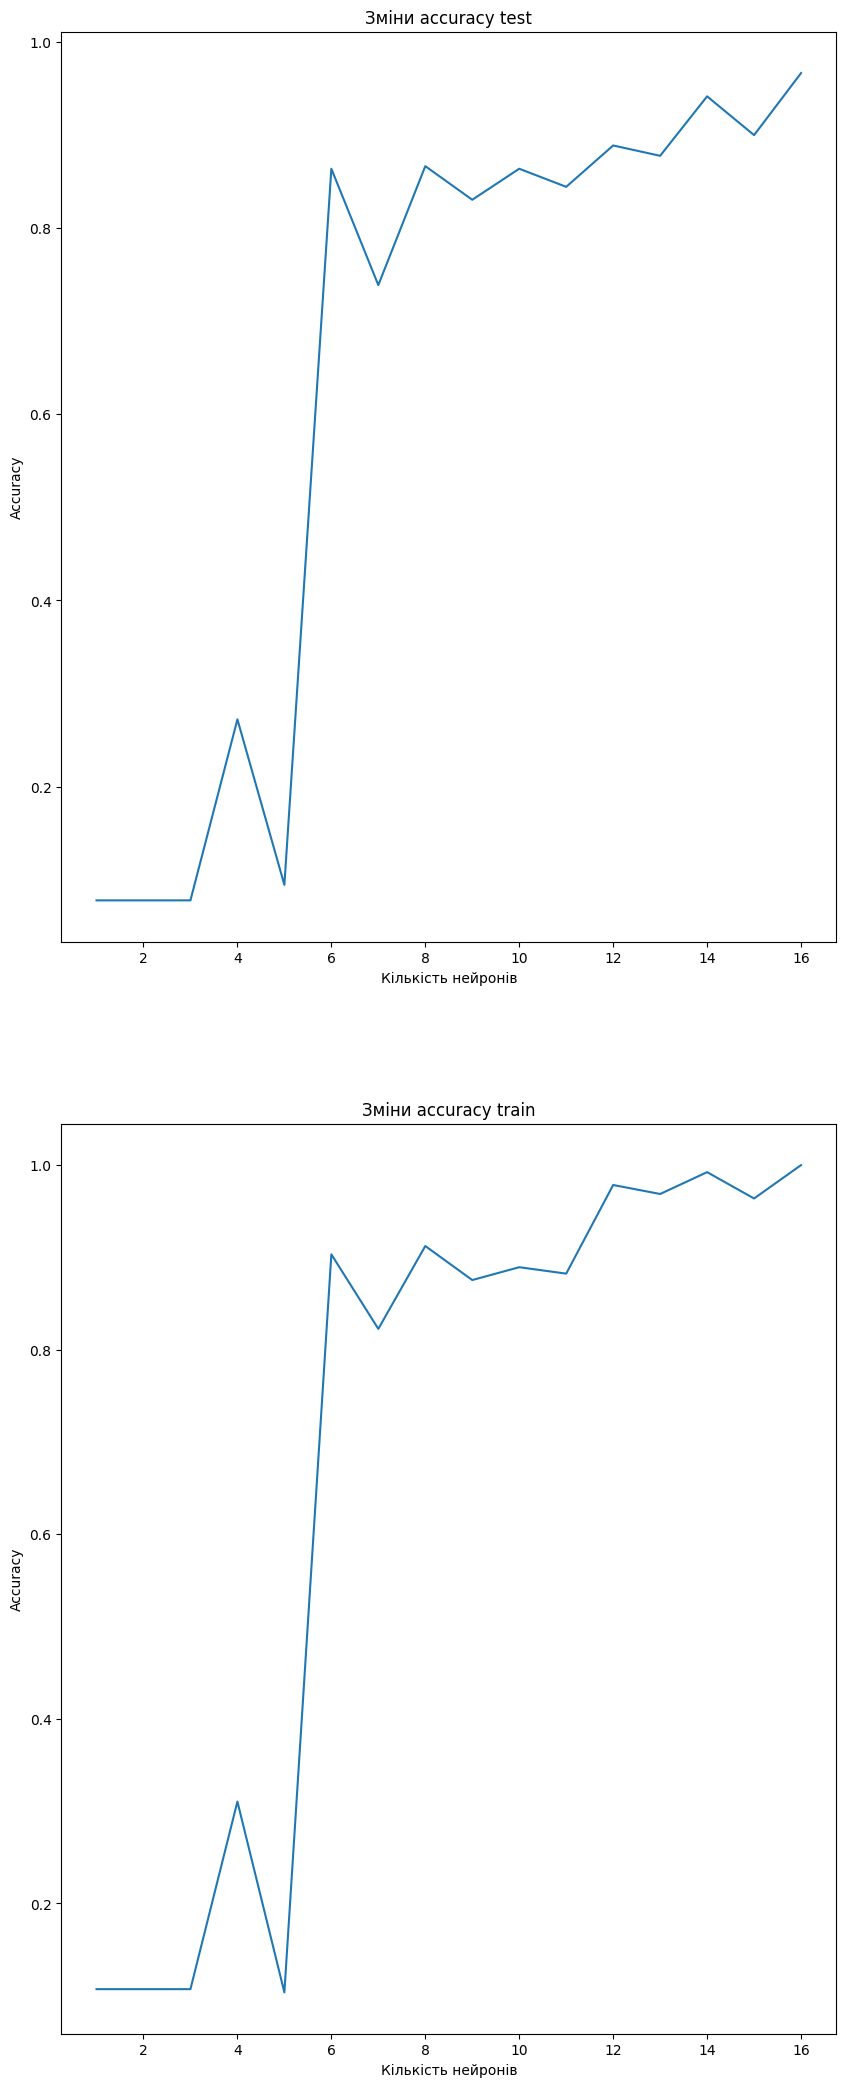

In [59]:
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
plt.figure(figsize=(10,26))
plt.subplot(2,1,1)
plt.plot(x,test_accuracies)
plt.xlabel("Кількість нейронів")
plt.ylabel("Accuracy")
plt.title("Зміни accuracy test")
plt.subplot(2,1,2)
plt.plot(x,train_accuracies)
plt.xlabel("Кількість нейронів")
plt.ylabel("Accuracy")
plt.title("Зміни accuracy train")
plt.show()

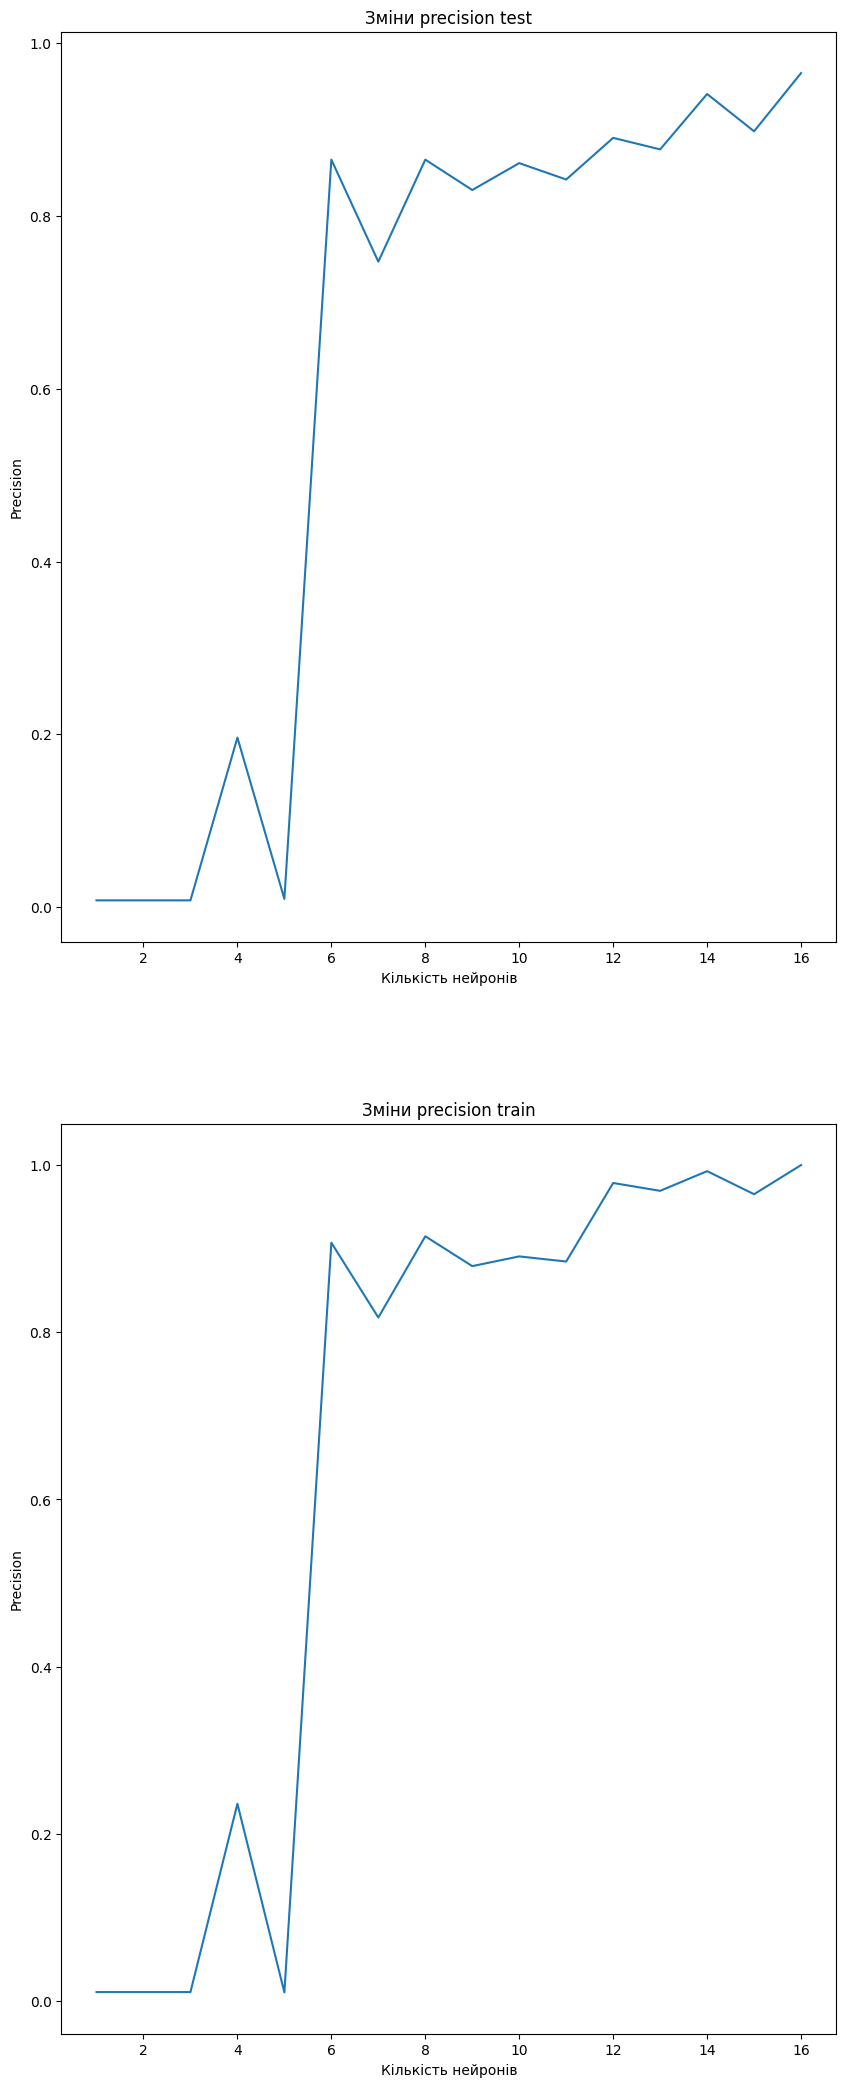

In [60]:
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
plt.figure(figsize=(10,26))
plt.subplot(2,1,1)
plt.plot(x,test_precisions)
plt.xlabel("Кількість нейронів")
plt.ylabel("Precision")
plt.title("Зміни precision test")
plt.subplot(2,1,2)
plt.plot(x,train_precisions)
plt.xlabel("Кількість нейронів")
plt.ylabel("Precision")
plt.title("Зміни precision train")
plt.show()

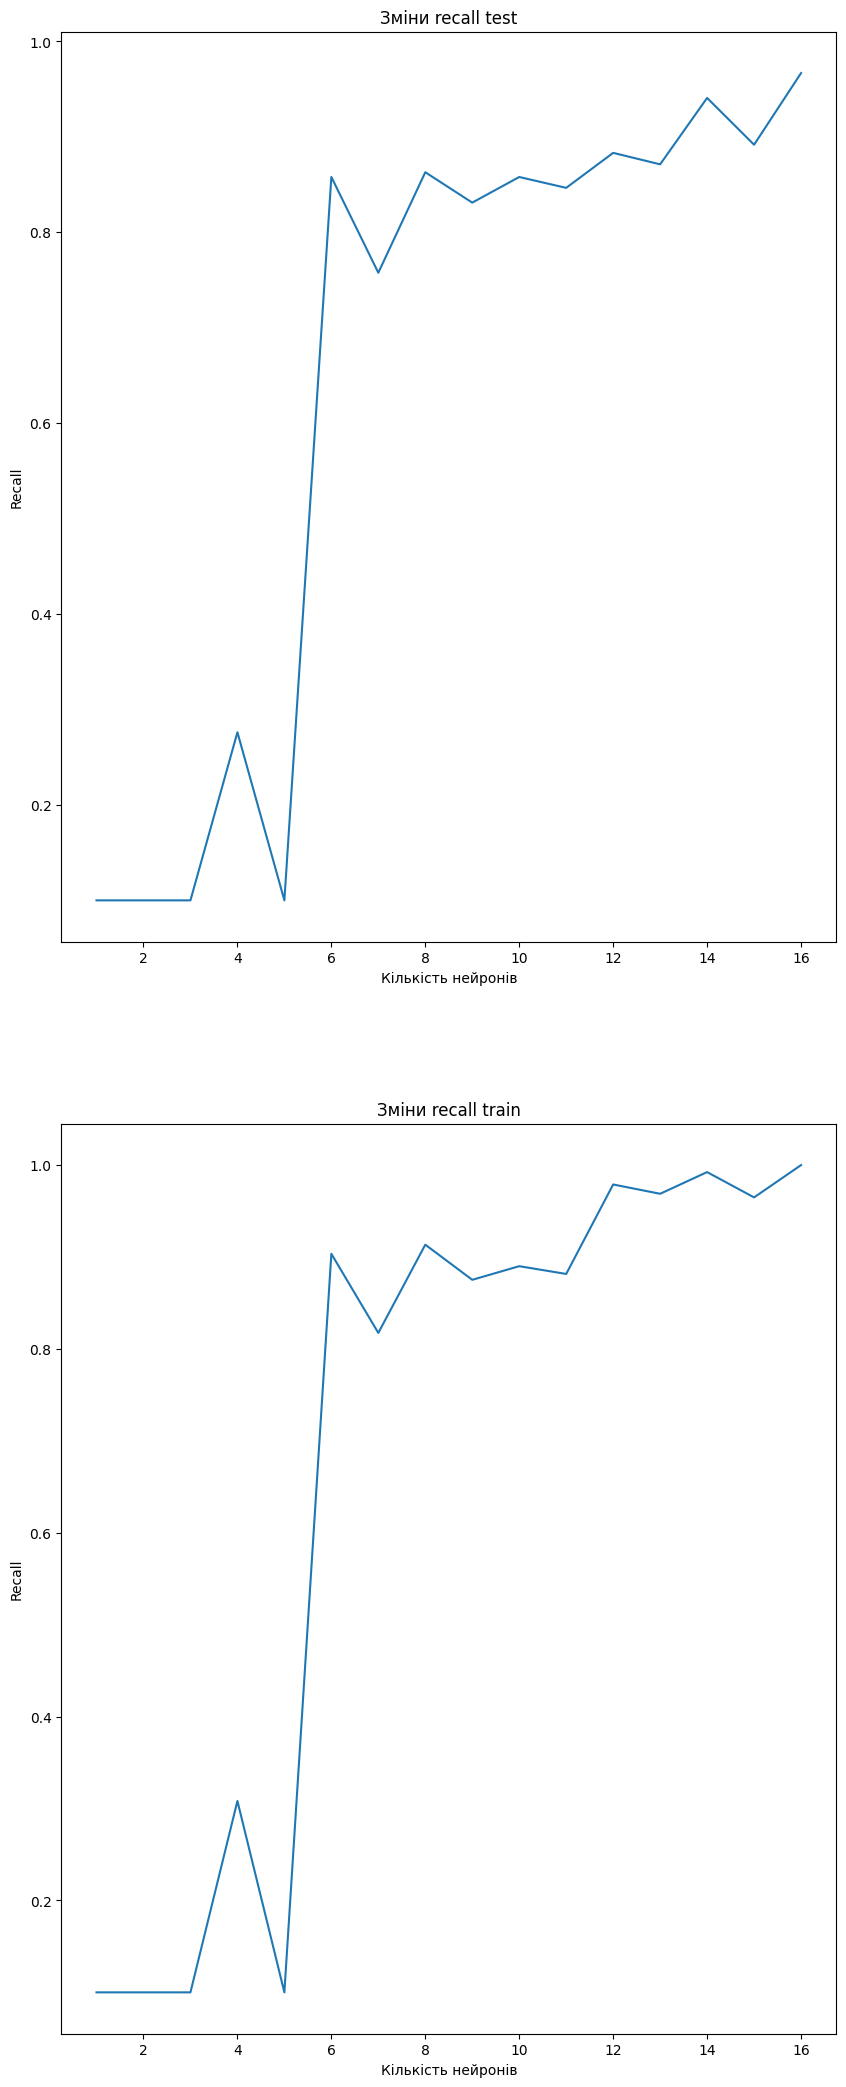

In [61]:
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
plt.figure(figsize=(10,26))
plt.subplot(2,1,1)
plt.plot(x,test_recalls)
plt.xlabel("Кількість нейронів")
plt.ylabel("Recall")
plt.title("Зміни recall test")
plt.subplot(2,1,2)
plt.plot(x,train_recalls)
plt.xlabel("Кількість нейронів")
plt.ylabel("Recall")
plt.title("Зміни recall train")
plt.show()

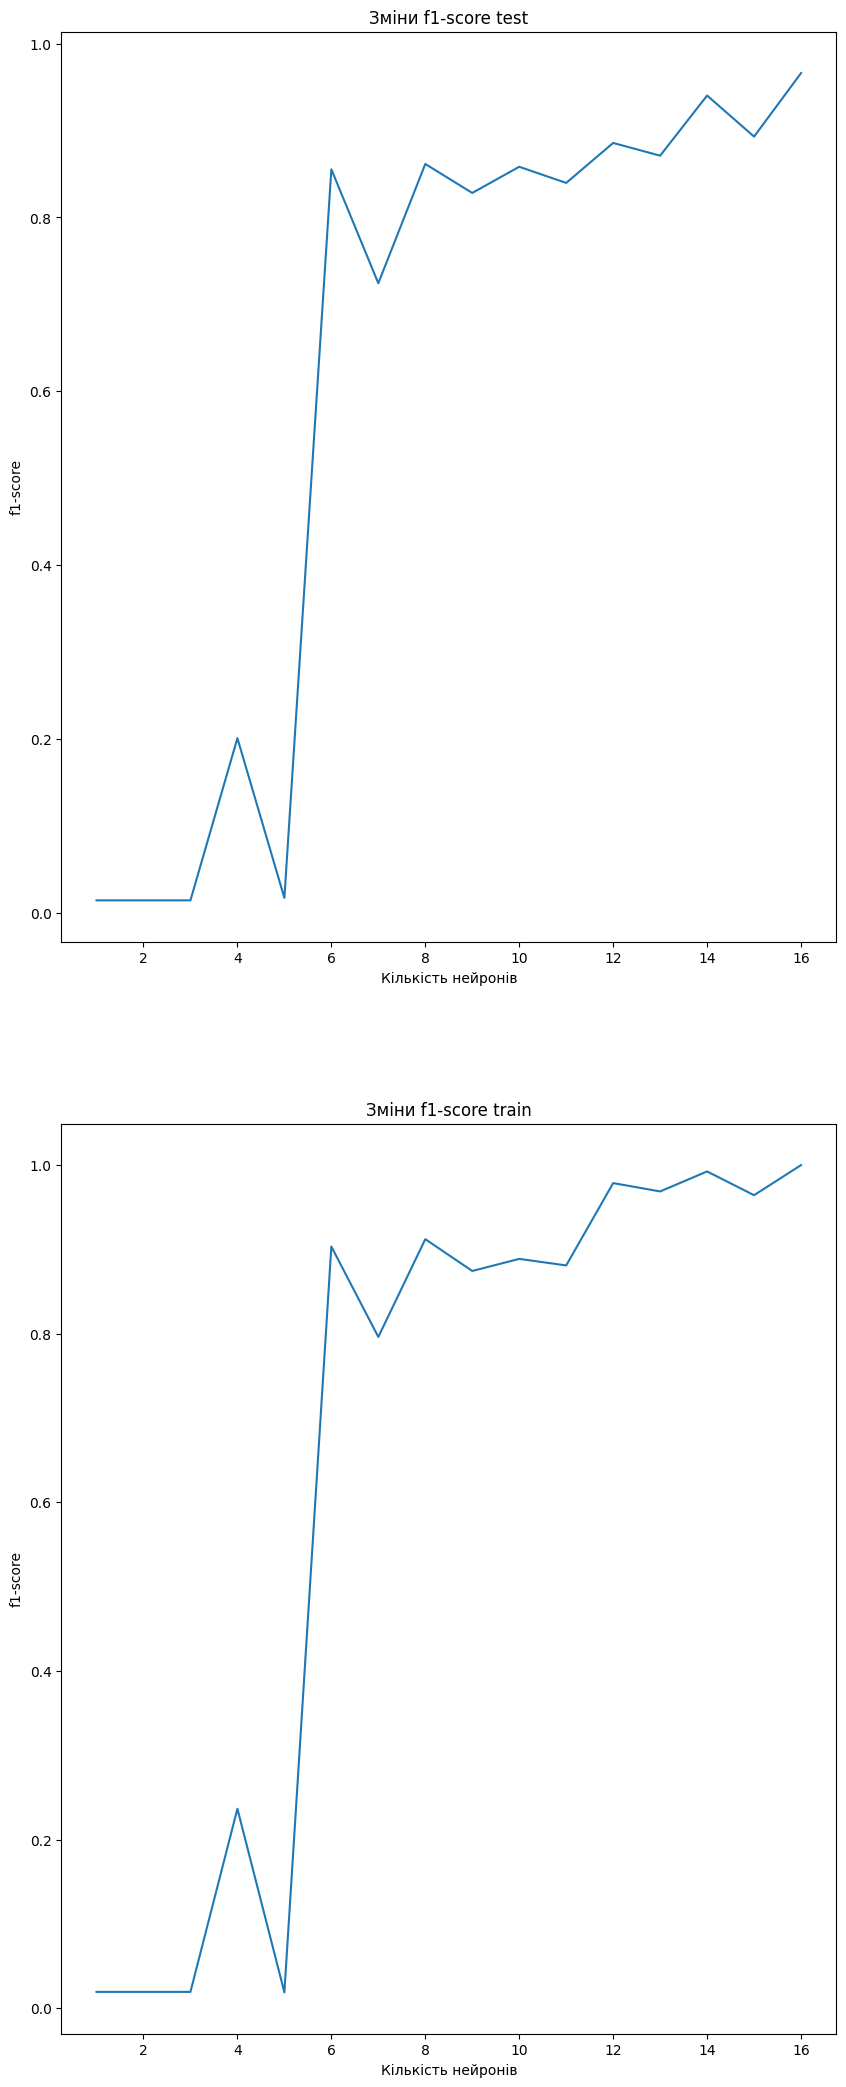

In [62]:
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
plt.figure(figsize=(10,26))
plt.subplot(2,1,1)
plt.plot(x,test_f1_scores)
plt.xlabel("Кількість нейронів")
plt.ylabel("f1-score")
plt.title("Зміни f1-score test")
plt.subplot(2,1,2)
plt.plot(x,train_f1_scores)
plt.xlabel("Кількість нейронів")
plt.ylabel("f1-score")
plt.title("Зміни f1-score train")
plt.show()

In [53]:
from sklearn.metrics import auc

roc_test_aucs = [] 
roc_train_aucs = []
pr_test_aucs = []
pr_train_aucs = []

def clean_and_sort(x, y):
    # Удаляем дублирующиеся значения и сортируем
    sorted_pairs = sorted(set(zip(x, y)))
    x_sorted, y_sorted = zip(*sorted_pairs)
    return x_sorted, y_sorted

for i in range(1, 17):
    # Подготовка данных для ROC-кривых (FPR и TPR)
    test_fpr_sorted, test_tpr_sorted = clean_and_sort(test_fpr_arr[i-1], test_tpr_arr[i-1])
    train_fpr_sorted, train_tpr_sorted = clean_and_sort(train_fpr_arr[i-1], train_tpr_arr[i-1])
    
    # Вычисление AUC для ROC-кривых
    test_auc = auc(test_fpr_sorted, test_tpr_sorted)
    roc_test_aucs.append(test_auc)
    
    train_auc = auc(train_fpr_sorted, train_tpr_sorted)
    roc_train_aucs.append(train_auc)
    
    # Подготовка данных для PR-кривых (Recall и Precision)
    PRrecall_test_sorted, PRprec_test_sorted = clean_and_sort(PRrecall_test[i-1], PRprec_test[i-1])
    PRrecall_train_sorted, PRprec_train_sorted = clean_and_sort(PRrecall_train[i-1], PRprec_train[i-1])
    
    # Вычисление AUC для PR-кривых
    test_auc = auc(PRrecall_test_sorted, PRprec_test_sorted)
    pr_test_aucs.append(test_auc)
    
    train_auc = auc(PRrecall_train_sorted, PRprec_train_sorted)
    pr_train_aucs.append(train_auc)


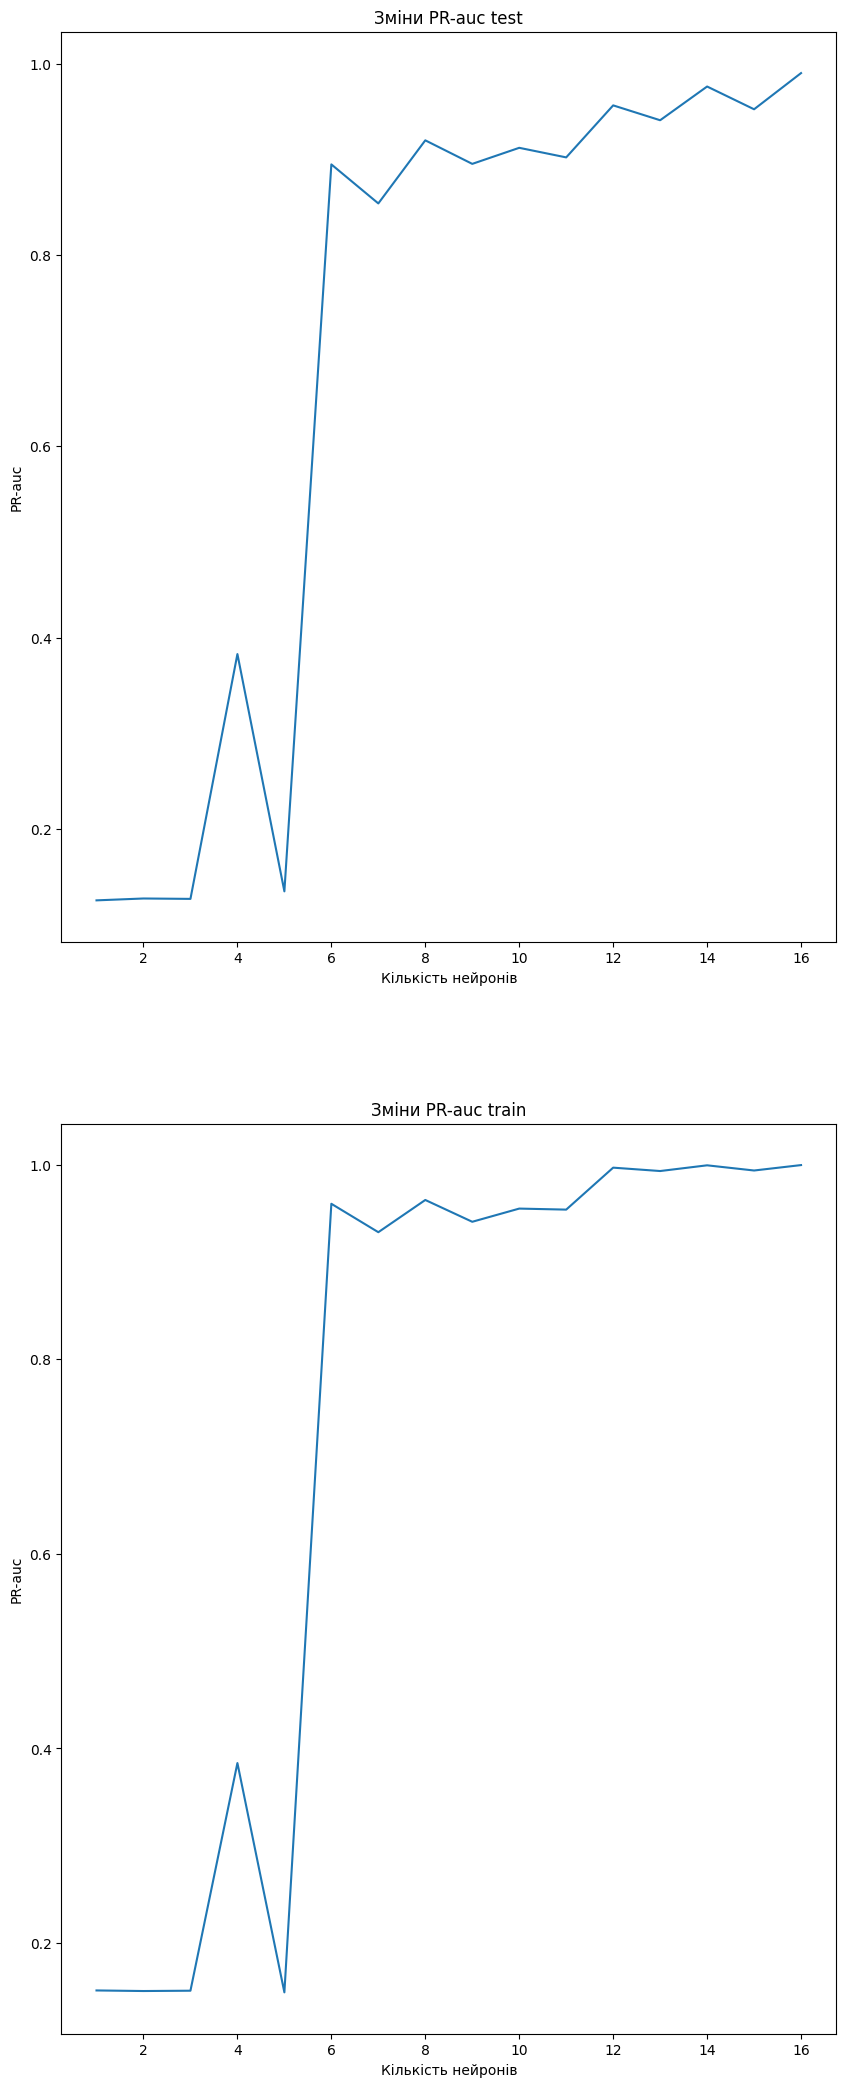

In [58]:
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
plt.figure(figsize=(10,26))
plt.subplot(2,1,1)
plt.plot(x,pr_test_aucs)
plt.xlabel("Кількість нейронів")
plt.ylabel("PR-auc")
plt.title("Зміни PR-auc test")
plt.subplot(2,1,2)
plt.plot(x,pr_train_aucs)
plt.xlabel("Кількість нейронів")
plt.ylabel("PR-auc")
plt.title("Зміни PR-auc train")
plt.show()

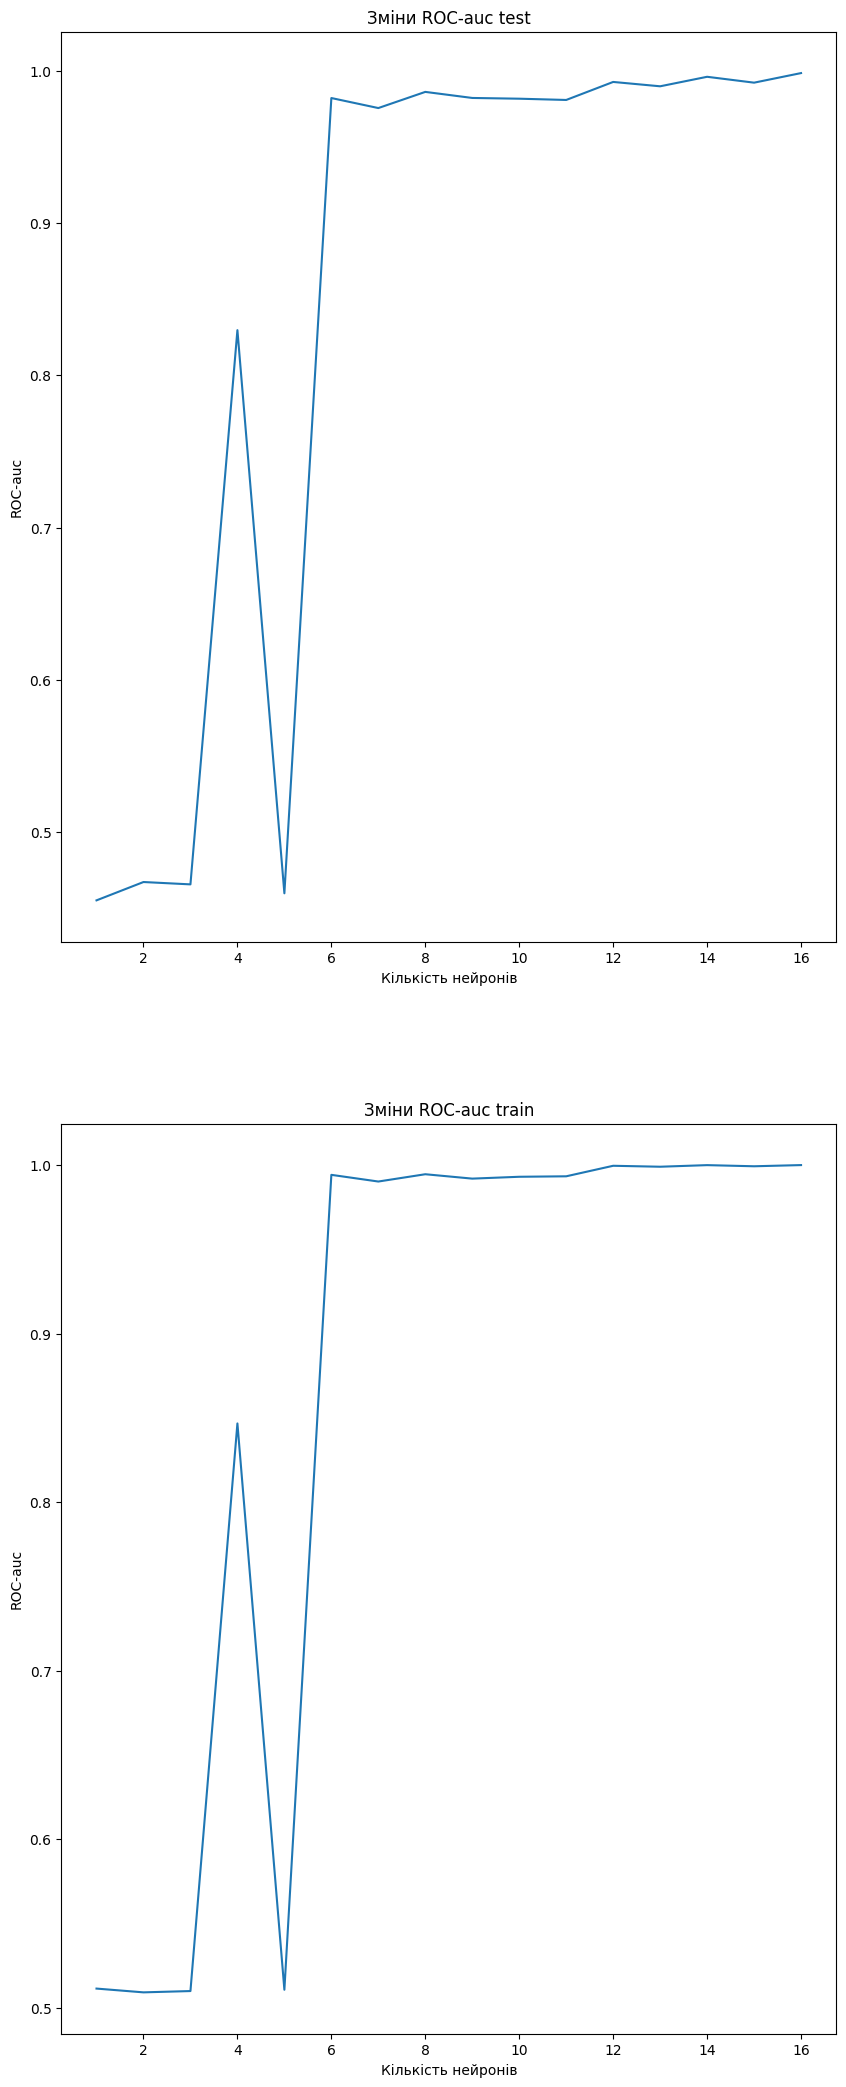

In [ ]:
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
plt.figure(figsize=(10,26))
plt.subplot(2,1,1)
plt.plot(x,roc_test_aucs)
plt.xlabel("Кількість нейронів")
plt.ylabel("ROC-auc")
plt.title("Зміни ROC-auc test")
plt.subplot(2,1,2)
plt.plot(x,roc_train_aucs)
plt.xlabel("Кількість нейронів")
plt.ylabel("ROC-auc")
plt.title("Зміни ROC-auc train")
plt.show()

### Побудуємо PR та ROC криві та матрицю неточностей для навченної моделі на 16 нейронів

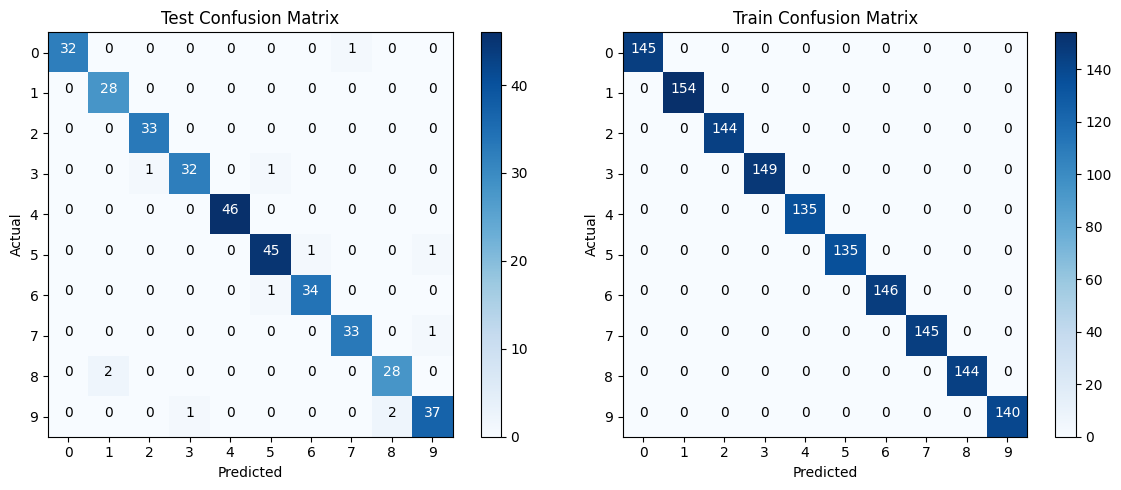

In [65]:
# Матриця неточностей
cm_Test = confusion_matrix(y_test, y_pred_test)
cm_Train = confusion_matrix(y_train, y_pred_train)

# Візуалізація матриць неточностей
def plot_confusion_matrix(cm, yex, title='Confusion matrix'):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(np.unique(yex)))
    plt.xticks(tick_marks, np.unique(yex))
    plt.yticks(tick_marks, np.unique(yex))
    
    # Підписуємо осі
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    
    # Виведення значень у квадратах матриці
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'), 
                 horizontalalignment="center", 
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

# Побудова матриці неточностей
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_confusion_matrix(cm_Test, y_test, title='Test Confusion Matrix')

plt.subplot(1, 2, 2)
plot_confusion_matrix(cm_Train, y_train, title='Train Confusion Matrix')


plt.show()

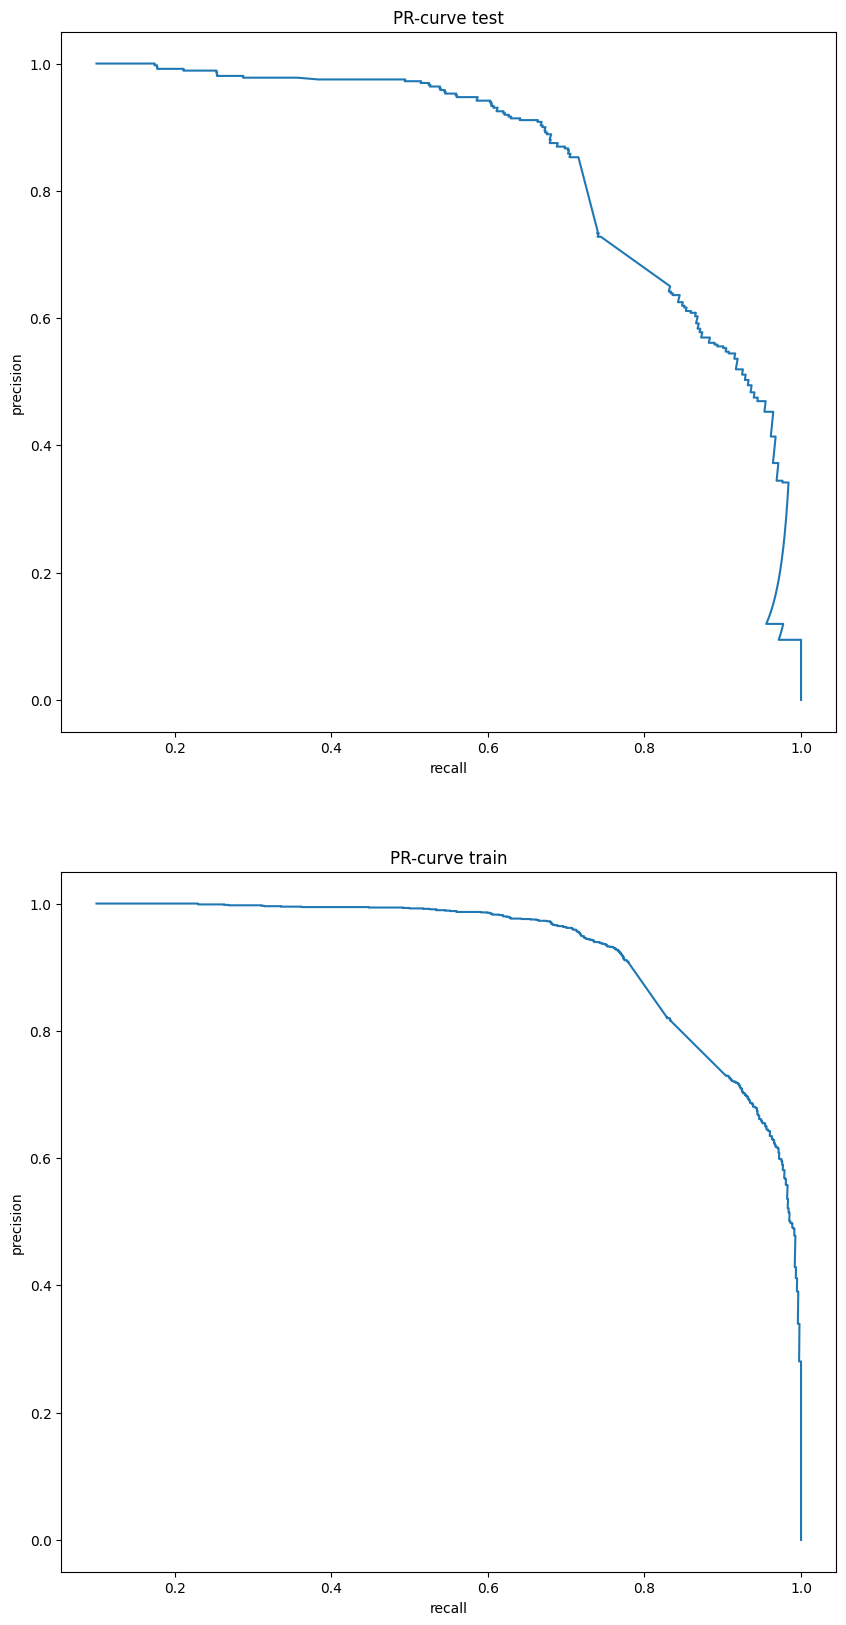

In [66]:
plt.figure(figsize=(10,20))
plt.subplot(2,1,1)
plt.plot(PRprec_test[6],PRrecall_test[6])
plt.xlabel("recall")
plt.ylabel("precision")
plt.title("PR-curve test")
plt.subplot(2,1,2)
plt.plot(PRprec_train[6],PRrecall_train[6])
plt.xlabel("recall")
plt.ylabel("precision")
plt.title("PR-curve train")
plt.show()

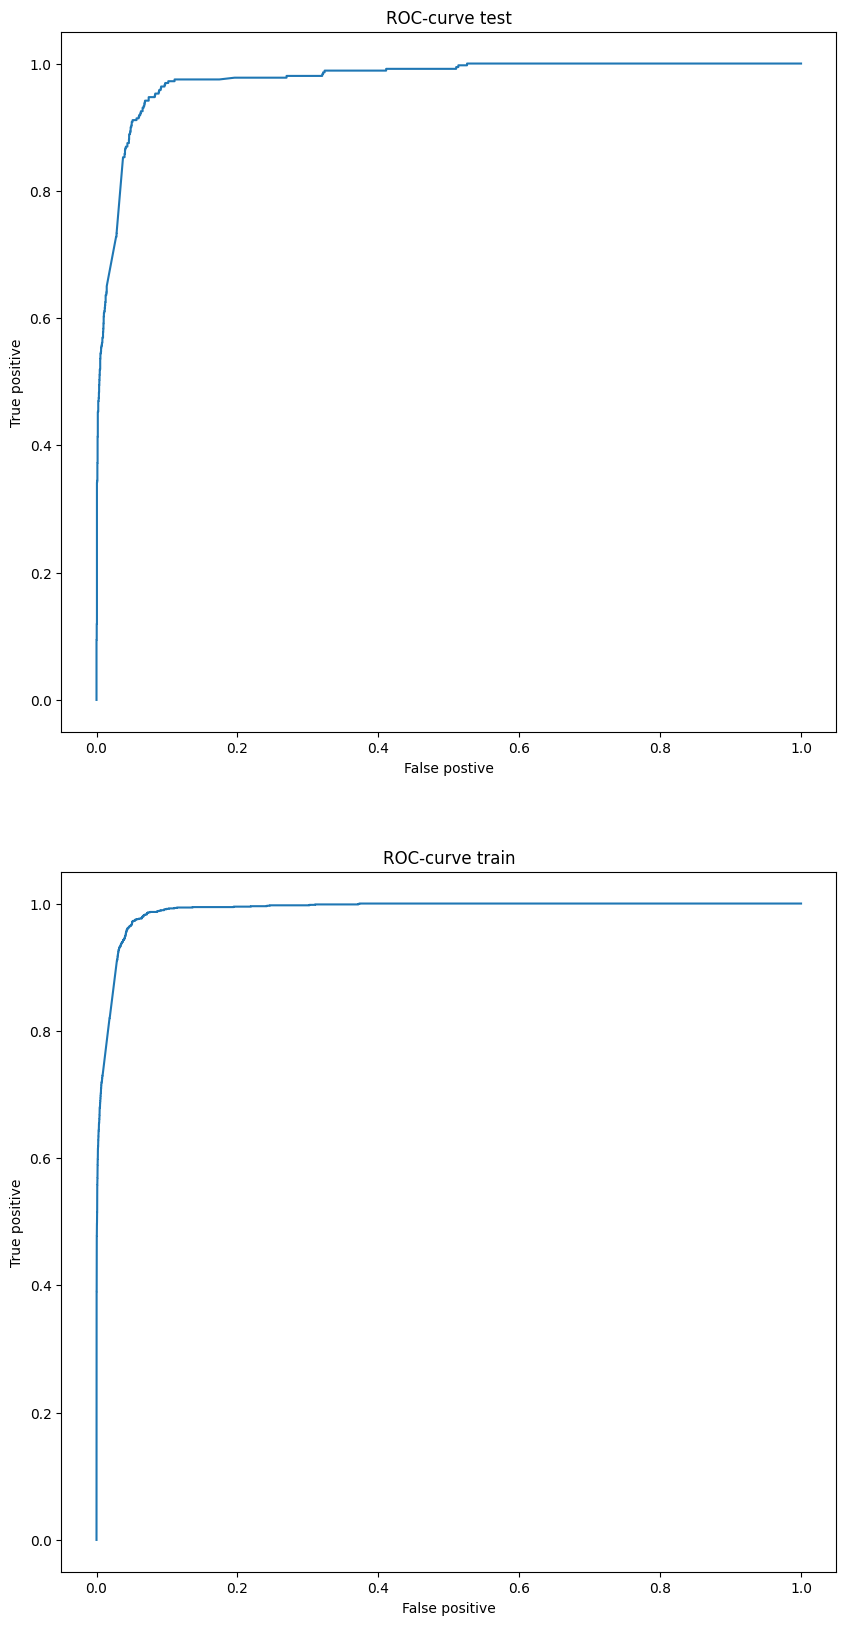

In [67]:
plt.figure(figsize=(10,20))
plt.subplot(2,1,1)
plt.plot(fpr_arr[6],tpr_arr[6])
plt.xlabel("False postive")
plt.ylabel("True positive")
plt.title("ROC-curve test")
plt.subplot(2,1,2)
plt.plot(train_fpr_arr[6],train_tpr_arr[6])
plt.xlabel("False positive")
plt.ylabel("True positive")
plt.title("ROC-curve train")
plt.show()

### 4) Представити моделi графiчно 

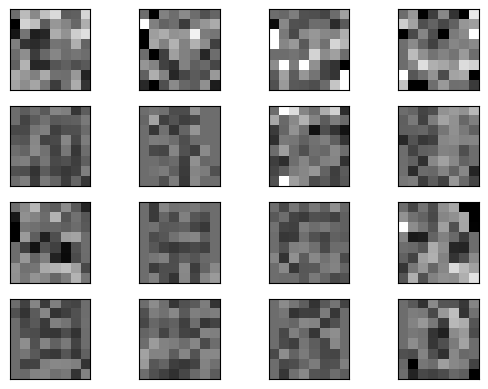

In [70]:
fig, axes = plt.subplots(4, 4)
vmin, vmax = multi_neurons_model1.coefs_[0].min(), multi_neurons_model1.coefs_[0].max()
for coef, ax in zip(multi_neurons_model1.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(8, 8), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

### 5)Виконати прогнози на основi побудованих моделей.

In [71]:
# Прогноз для тестового набору
y_pred_test= multi_neurons_model1.predict(X_test)
print("Прогноз для тестового набору для перших 10 прикладів:", y_pred_test[:10])
# Прогноз для навчального набору
y_pred_train = multi_neurons_model1.predict(X_train)
print("Прогноз для навчального набору для перших 10 прикладів:", y_pred_train[:10])

Прогноз для тестового набору для перших 10 прикладів: [6 9 3 7 2 1 5 2 5 2]
Прогноз для навчального набору для перших 10 прикладів: [6 0 0 3 0 5 0 0 4 1]


### 6)Для кожної з моделей оцiнити, чи має мiсце перенавчання.

In [79]:
print(multi_neurons_model1.score(X_train,y_train))
print(multi_neurons_model1.score(X_test,y_test))

1.0
0.9666666666666667


Як можна бачити різниця між у результатах між навчальною і тестовою вибіркою незначна отже перенавчання відсутнє

### 7) Розрахуємо додатковi результати моделей, згiдно з варiантом. Варіант 11 - Для кожної моделi розрахувати апостерiорнi iмовiрностi для тестового прикладу, використовуючи метод predict_proba.

In [73]:
proba_test = multi_neurons_model1.predict_proba(X_test)

df_proba = pd.DataFrame(proba_test, columns=[f'Клас {i}' for i in multi_neurons_model1.classes_])

print("Апостеріорна ймовірність:")
print(df_proba.head(10))

Апостеріорна ймовірність:
         Клас 0        Клас 1        Клас 2        Клас 3        Клас 4  \
0  8.738799e-13  2.585630e-19  1.734984e-10  2.239928e-15  1.220465e-08   
1  4.210139e-08  1.357665e-18  3.068749e-18  2.278448e-09  1.138437e-13   
2  4.792441e-19  9.501356e-22  5.576958e-10  9.999995e-01  3.417542e-19   
3  5.909548e-06  7.218053e-11  1.411118e-10  5.857144e-05  8.161650e-11   
4  5.380641e-21  7.161095e-21  9.999922e-01  7.780206e-06  1.515261e-29   
5  1.176700e-17  9.354844e-01  6.435579e-02  3.312750e-20  1.885418e-12   
6  1.459259e-10  1.346185e-13  5.611770e-15  1.277748e-09  3.098699e-17   
7  2.796445e-15  1.544510e-16  9.832768e-01  1.671306e-02  3.158915e-19   
8  2.468810e-08  2.027708e-14  3.882746e-11  1.113352e-06  7.905449e-15   
9  1.060274e-19  1.063043e-21  9.999958e-01  1.482381e-07  4.868837e-26   

         Клас 5        Клас 6        Клас 7        Клас 8        Клас 9  
0  8.807680e-11  9.999760e-01  9.648251e-14  2.394500e-05  3.870230e-21  


### 11) Спробувати виконати решiтчастий пошук (grid search) для пiдбору гiперпараметрiв моделі.

In [77]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Визначимо параметри для пошуку
param_grid = {
    'hidden_layer_sizes': [(5,), (10,), (15,), (20,)],  # приклади кількості нейронів
    'learning_rate_init': [0.001, 0.01, 0.1],           # початкова швидкість навчання
    'max_iter': [500, 1000, 1500],                      # максимальна кількість ітерацій
    'learning_rate': ['constant', 'adaptive'],          # тип навчання
    'alpha': [0.001, 0.01, 0.1]                      # параметр регуляризації
}

# Створимо модель
mlp = MLPClassifier(random_state=42)

# Виконаємо Grid Search
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Отримуємо найкращі параметри
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated accuracy: ", grid_search.best_score_)


Best parameters found:  {'alpha': 0.1, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'max_iter': 500}
Best cross-validated accuracy:  0.9554394115369724


In [78]:
# Оцінка на тестових даних
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test set score: ", test_score)

Test set score:  0.9722222222222222


Як можна бачити вона не перевищує показник натренованої до цього моделі.

### 13) Навчити моделi на пiдмножинах навчальних даних. Оцiнити, наскiльки розмiр навчальної множини впливає на якiсть моделi.

In [82]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Розміри підмножин у відсотках (25%, 50%, 75%, 100%)
subset_sizes = [0.25, 0.5, 0.75]
results = {}

for size in subset_sizes:
    # Виділяємо підмножину навчальних даних
    X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    
    # Навчання моделі на підмножині
    model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)  # приклад архітектури
    model.fit(X_train_subset, y_train_subset)
    
    # Оцінка якості на тестовому наборі
    y_pred_test = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_test)
    
    # Збереження результатів для подальшого аналізу
    results[size] = accuracy

# Результати
for size, accuracy in results.items():
    print(f"Розмір навчального набору: {int(size * 100)}%, точність: {accuracy:.4f}")


Розмір навчального набору: 25%, точність: 0.9167
Розмір навчального набору: 50%, точність: 0.9361
Розмір навчального набору: 75%, точність: 0.9500


Як можна бачити розмір навчальної вибірки позитивно впливає на подальшу роботу моделі.

### 8) В задачах класифiкацiї побудувати границi рiшень графiчно для моделі.

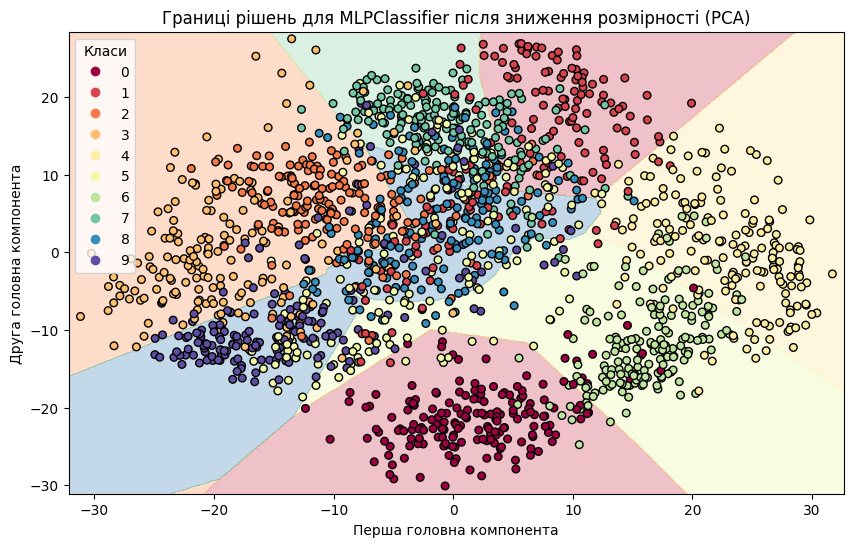

: 

In [ ]:
from sklearn.decomposition import PCA

# Завантажуємо дані
digits = load_digits()
X, y = digits.data, digits.target

# Зменшуємо кількість ознак до двох за допомогою PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Розділяємо дані на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Навчаємо модель
model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Створення сітки для побудови границі рішень
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Прогнозуємо значення для кожної точки на сітці
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Відображення меж рішень
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Spectral)

# Відображення точок даних
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.Spectral, edgecolor='k', s=30)
plt.xlabel("Перша головна компонента")
plt.ylabel("Друга головна компонента")
plt.title("Границі рішень для MLPClassifier після зниження розмірності (PCA)")
plt.legend(*scatter.legend_elements(), title="Класи")
plt.show()


Пояснення:

1) Зниження розмірності: використовуємо PCA для зменшення кількості ознак до двох.
2) Навчання моделі: модель MLPClassifier навчається на скороченому наборі ознак.
3) Побудова сітки: створюємо двовимірну сітку точок для передбачення класів у кожній точці.
4) Контурна діаграма: за допомогою plt.contourf візуалізуємо межі рішень. Графік покаже, як модель розділяє простір між класами.
Зауважимо, що цей метод зниження розмірності дозволяє візуалізувати межі рішень, але він може втратити деяку інформацію через скорочення розмірності.